# **Notebook Summary**

## **Demographics:**
- **Male:** 51.0% | **Female:** 49.0%
- **Age distribution:** Males are more than females, except at ages 20 & 23 where females are more.
- **Highest frequency of ages:** 21 → 23 → 22 → 24 → 19 → 18 → 20.
- **In all departments, females outnumber males.**
- **Highest frequency in departments:** Computer Science (CS) is the highest, Mathematics is the lowest.
- **Grade distribution:**
  - Males have a higher count in **A** grade.
  - In all other grades (except A), females outnumber males.
- **Highest frequency in grades:** A (highest) → C (lowest).
- **Extracurricular Activities:** About **70%** of students do not participate.
- **Internet access:** About **90%** of students have internet at home.
- **Family income levels:**
  - **Low:** 39.7%
  - **Medium:** 39.5%
  - **High:** 20.9%
- **Parental Education Levels:**
  - **PhD:** 52.3% (highest)
  - **Master's degree:** Lowest, with a small difference from High School & Bachelor's.

## **Performance Analysis:**
- **A grade** is expected to have the highest scores across tests and projects.
  - However, **A grade students only have a high score in attendance**.
  - This suggests an **unusually high weight for attendance**.
  - A **recalculation is needed** in the final section of the notebook.
  - **Best solution:** Consult a domain expert to verify the **grade and total score formula**.
- **Department performance distribution:**
  - **Attendance:** 75%
  - **Midterm Score:** 70
  - **Assignments:** 74.5
  - **Quizzes:** 74.5
  - **Participation Score:** 5
  - **Projects Score:** 75
  - **Total Score:** 75
- **Extracurricular activities, internet access, parent education level, and family income level** have **minimal impact on performance and scores**.

## **Behavior Analysis:**
- **Study hours per week:**
  - Mathematics students study the least (**17 hours/week**).
  - Other departments study around **18 hours/week**.
- **Stress levels:**  
  - Same across all departments (**5.5**).
- **Sleep hours per night:**  
  - Same across all departments (**6.5 hours/night**).
- **Grades and behavior correlation:**  
  - **Study hours:** 17.5  
  - **Stress level:** 5.5  
  - **Sleep hours:** 6.5  
- **Family income level, parental education, internet access, and extracurricular activities** do **not significantly impact** study hours, stress levels, or sleep hours.

## **Hypothesis Testing:**
- **Males have a higher probability** of achieving a **higher total score** than females.
- **Internet access and extracurricular activities** have a **positive impact** on total score and student behavior.


#   **Student Analysis and Prediction**

In [111]:
# load libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv("Students_Grading_Dataset.csv")
df.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                     NaN   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  

[5 rows x 23 columns]

In [113]:
df.shape

(5000, 23)

**Data Preprossing**

In [114]:
# drop unnessiry coloumn
df.drop(['Student_ID','First_Name','Last_Name','Email'],axis=1,inplace =True)
df.head()

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0  Female   22  Engineering           52.29          55.03        57.82   
1    Male   18  Engineering           97.27          97.23        45.80   
2    Male   24     Business           57.19          67.05        93.68   
3  Female   24  Mathematics           95.15          47.79        80.63   
4  Female   23           CS           54.18          46.59        78.89   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0            84.22        74.06                 3.99           85.90   
1              NaN        94.24                 8.32           55.65   
2            67.70        85.70                 5.05           73.79   
3            66.06        93.51                 6.54           92.12   
4            96.85        83.70                 5.97           68.42   

   Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0        56.09     F                   6.2                         No   
1        50.64     A                  19.0                         No   
2        70.30     D                  20.7                         No   
3        61.63     A                  24.8                        Yes   
4        66.13     F                  15.4                        Yes   

  Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                     Yes            High School              Medium   
1                     Yes                    NaN              Medium   
2                     Yes               Master's                 Low   
3                     Yes            High School                High   
4                     Yes            High School                High   

   Stress_Level (1-10)  Sleep_Hours_per_Night  
0                    5                    4.7  
1                    4                    9.0  
2                    6                    6.2  
3                    3                    6.7  
4                    2                    7.1

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              4484 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             4483 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

Handiling Missing values

In [116]:
df.isnull().sum()

Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [117]:
#fill Attendance and Assignments_Avg with median (to optimise outlier)
df["Attendance (%)"] = df['Attendance (%)'].fillna(df["Attendance (%)"].median())
df["Assignments_Avg"] = df['Assignments_Avg'].fillna(df["Assignments_Avg"].median())

# drop Parent_Education_Level col. for huge missing value.
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].value_counts().index[0])

In [118]:
df.isnull().sum()

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [119]:
df.duplicated().sum()

0

In [120]:
df.head()

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0  Female   22  Engineering           52.29          55.03        57.82   
1    Male   18  Engineering           97.27          97.23        45.80   
2    Male   24     Business           57.19          67.05        93.68   
3  Female   24  Mathematics           95.15          47.79        80.63   
4  Female   23           CS           54.18          46.59        78.89   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0            84.22        74.06                 3.99           85.90   
1            74.81        94.24                 8.32           55.65   
2            67.70        85.70                 5.05           73.79   
3            66.06        93.51                 6.54           92.12   
4            96.85        83.70                 5.97           68.42   

   Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0        56.09     F                   6.2                         No   
1        50.64     A                  19.0                         No   
2        70.30     D                  20.7                         No   
3        61.63     A                  24.8                        Yes   
4        66.13     F                  15.4                        Yes   

  Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                     Yes            High School              Medium   
1                     Yes                    PhD              Medium   
2                     Yes               Master's                 Low   
3                     Yes            High School                High   
4                     Yes            High School                High   

   Stress_Level (1-10)  Sleep_Hours_per_Night  
0                    5                    4.7  
1                    4                    9.0  
2                    6                    6.2  
3                    3                    6.7  
4                    2                    7.1

In [121]:
df.describe().T

count       mean        std    min      25%     50%  \
Age                    5000.0  21.048400   1.989786  18.00  19.0000  21.000   
Attendance (%)         5000.0  75.461708  13.610774  50.01  64.7375  75.725   
Midterm_Score          5000.0  70.326844  17.213209  40.00  55.4575  70.510   
Final_Score            5000.0  69.640788  17.238744  40.00  54.6675  69.735   
Assignments_Avg        5000.0  74.799844  13.646227  50.00  63.6875  74.810   
Quizzes_Avg            5000.0  74.910728  14.504281  50.03  62.4900  74.695   
Participation_Score    5000.0   4.980024   2.890136   0.00   2.4400   4.955   
Projects_Score         5000.0  74.924860  14.423415  50.01  62.3200  74.980   
Total_Score            5000.0  75.121804  14.399941  50.02  62.8350  75.395   
Study_Hours_per_Week   5000.0  17.658860   7.275864   5.00  11.4000  17.500   
Stress_Level (1-10)    5000.0   5.480800   2.861550   1.00   3.0000   5.000   
Sleep_Hours_per_Night  5000.0   6.488140   1.452283   4.00   5.2000   6.500   

                           75%     max  
Age                    23.0000   24.00  
Attendance (%)         86.1825  100.00  
Midterm_Score          84.9700   99.98  
Final_Score            84.5000   99.98  
Assignments_Avg        85.5700   99.98  
Quizzes_Avg            87.6300   99.96  
Participation_Score     7.5000   10.00  
Projects_Score         87.3675  100.00  
Total_Score            87.6525   99.99  
Study_Hours_per_Week   24.1000   30.00  
Stress_Level (1-10)     8.0000   10.00  
Sleep_Hours_per_Night   7.7000    9.00

In [122]:
df.describe(include='O').T

count unique   top  freq
Gender                      5000      2  Male  2551
Department                  5000      4    CS  2022
Grade                       5000      5     A  1495
Extracurricular_Activities  5000      2    No  3493
Internet_Access_at_Home     5000      2   Yes  4485
Parent_Education_Level      5000      4   PhD  2614
Family_Income_Level         5000      3   Low  1983

**EDA**

In [123]:
df.head()

Gender  Age   Department  Attendance (%)  Midterm_Score  Final_Score  \
0  Female   22  Engineering           52.29          55.03        57.82   
1    Male   18  Engineering           97.27          97.23        45.80   
2    Male   24     Business           57.19          67.05        93.68   
3  Female   24  Mathematics           95.15          47.79        80.63   
4  Female   23           CS           54.18          46.59        78.89   

   Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
0            84.22        74.06                 3.99           85.90   
1            74.81        94.24                 8.32           55.65   
2            67.70        85.70                 5.05           73.79   
3            66.06        93.51                 6.54           92.12   
4            96.85        83.70                 5.97           68.42   

   Total_Score Grade  Study_Hours_per_Week Extracurricular_Activities  \
0        56.09     F                   6.2                         No   
1        50.64     A                  19.0                         No   
2        70.30     D                  20.7                         No   
3        61.63     A                  24.8                        Yes   
4        66.13     F                  15.4                        Yes   

  Internet_Access_at_Home Parent_Education_Level Family_Income_Level  \
0                     Yes            High School              Medium   
1                     Yes                    PhD              Medium   
2                     Yes               Master's                 Low   
3                     Yes            High School                High   
4                     Yes            High School                High   

   Stress_Level (1-10)  Sleep_Hours_per_Night  
0                    5                    4.7  
1                    4                    9.0  
2                    6                    6.2  
3                    3                    6.7  
4                    2                    7.1

In [124]:
def countplot_ratio(data, x, hue=None, ax=None, rotate_xlabel=0):
    ax = sns.countplot(data=data, x=x, hue=hue, ax=ax)
    # Rotate x-axis labels based on the rotate_xlabel parameter
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
    ax.set_title(x + " Distributions")
    
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 3,
                    '{:.2f}%'.format((height / total) * 100), 
                    fontsize=12, weight='bold', ha="center")

In [125]:
def get_Pie(data, col):
    '''
    Creates pie chart that automatically adjusts to the number of categories
    '''
    values = data[col].value_counts()
    explode = [0.1] + [0]*(len(values)-1)
    colors = ['#FFD700', '#FFB6C1', '#87CEEB', '#98FB98', '#DDA0DD', '#FFA07A','#FFF087']
    
    plt.pie(
        values,
        labels=values.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(values)],
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'brown', 'linewidth': 2}
    )
    
    plt.title(f'{col} State', fontweight='bold')
    plt.gca().axis('equal')

In [126]:
def distribution_fig(data,col,rows=10,cols=5,hue=None):
    '''
        figure data using Countplot_ratio,
        based on  data, coloumn name, rows, cols, & hue if possible.
    '''
    plt.figure(figsize=(rows,cols))
    countplot_ratio(data,col,hue=hue)
    plt.title(f"Distribution of {col}")
    plt.show()

In [127]:
def state_fig(data,col,rows=10,cols=5):
    '''
        figure data using get_pie,
        based on  data, coloumn name, rows & cols.
    '''
    plt.figure(figsize=(rows,cols))
    get_Pie(data,col)
    plt.title(f"States of {col}")
    plt.show()

**Start with Categorical Data**

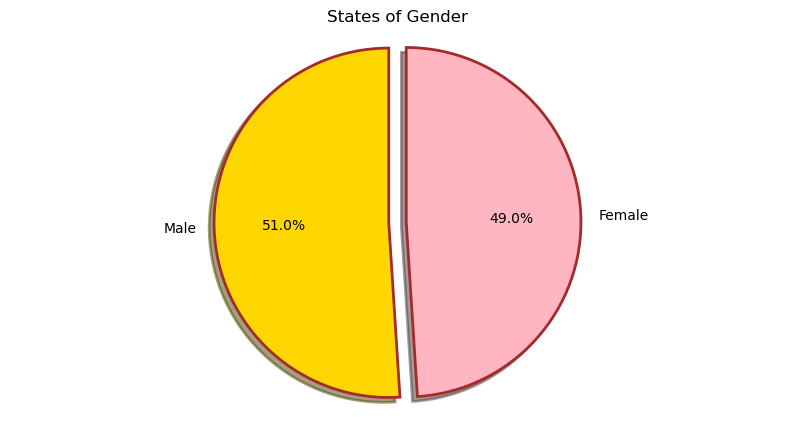

In [128]:
state_fig(df,'Gender')

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


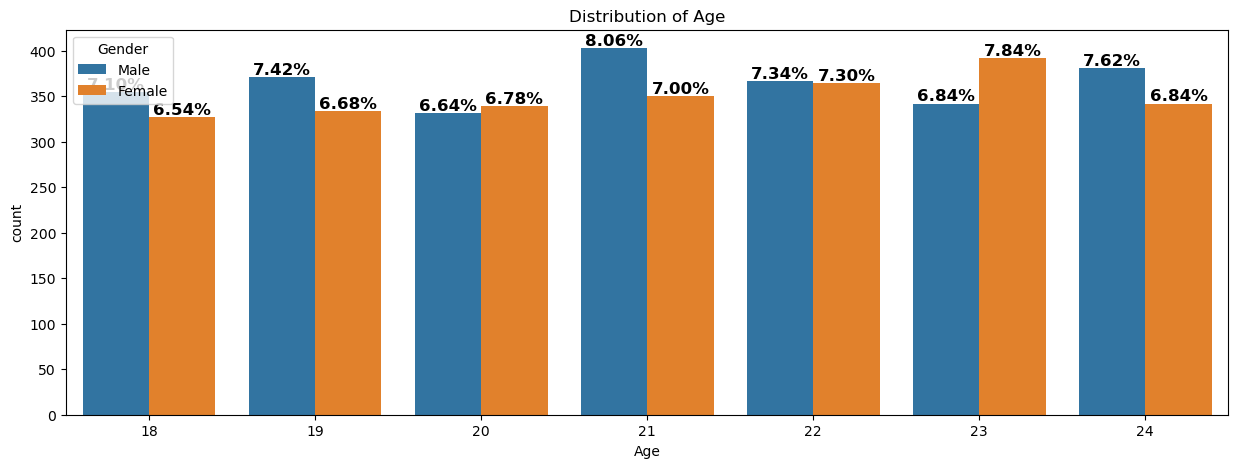

In [129]:
distribution_fig(rows=15,cols=5,data = df,col='Age',hue='Gender')

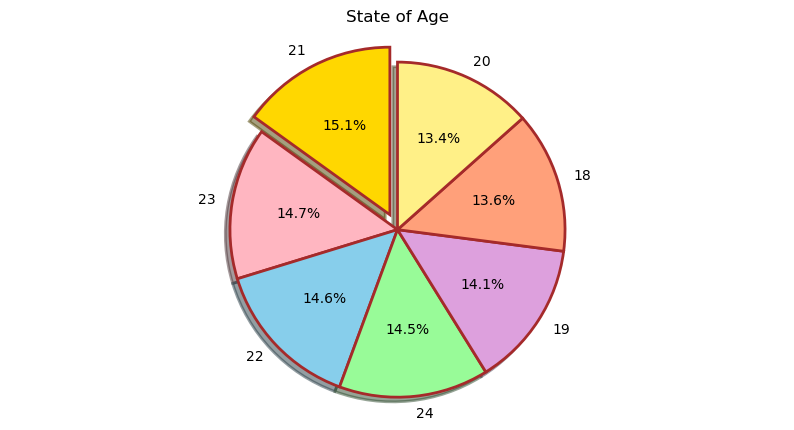

In [130]:
plt.figure(figsize=(10,5))
get_Pie(df,'Age')
plt.title('State of Age')
plt.show()

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


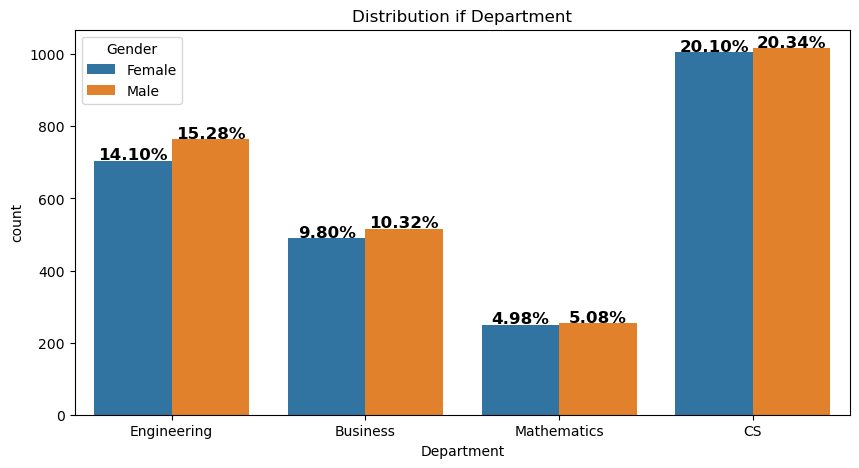

In [131]:
plt.figure(figsize=(10,5))
countplot_ratio(df,'Department',hue='Gender')
plt.title("Distribution if Department")
plt.show()

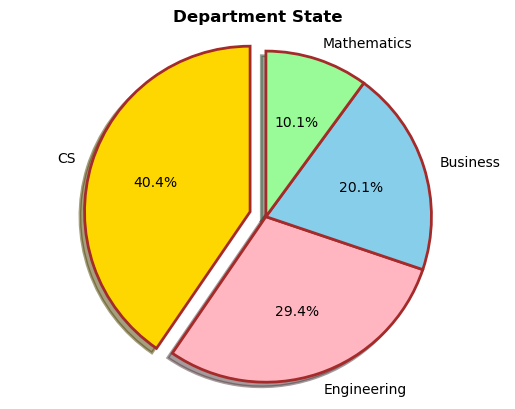

In [132]:
get_Pie(df,'Department')

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


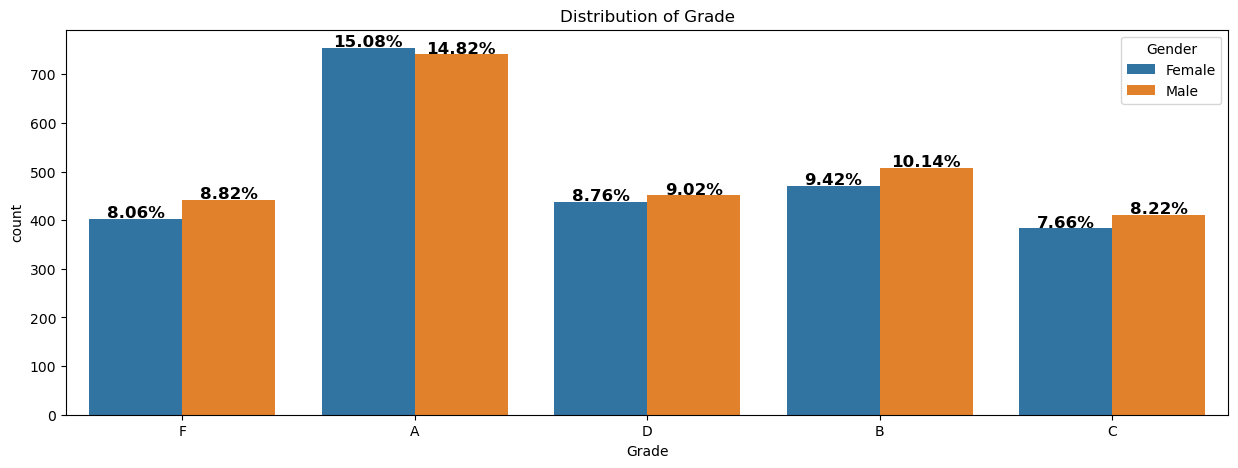

In [133]:
distribution_fig(df,'Grade',15,hue='Gender')

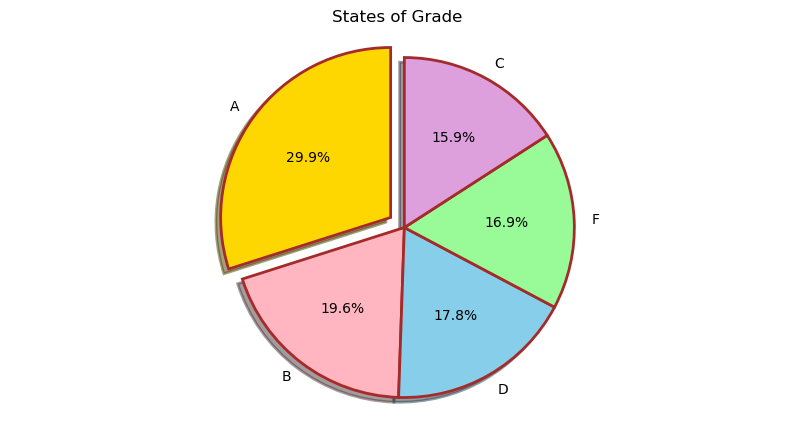

In [134]:
state_fig(df,'Grade')

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


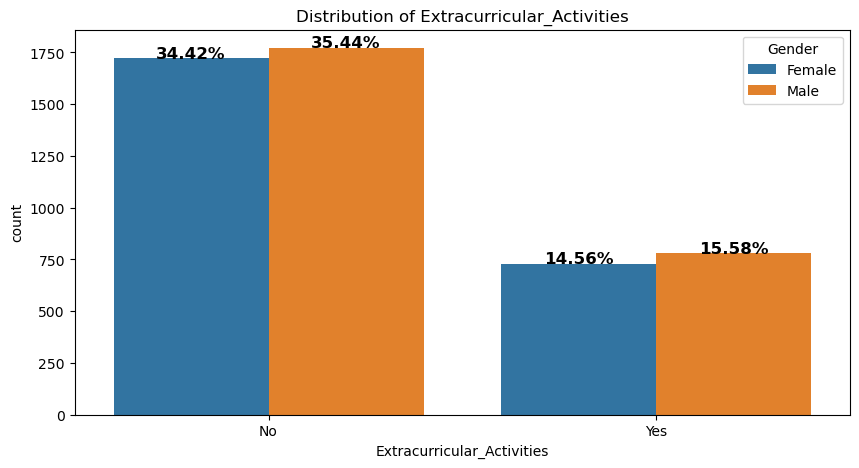

In [135]:
distribution_fig(df,'Extracurricular_Activities',hue='Gender')

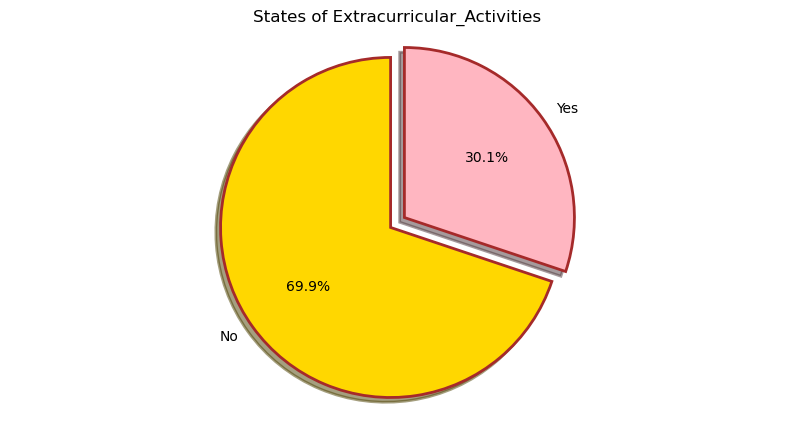

In [136]:
state_fig(df,'Extracurricular_Activities')

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


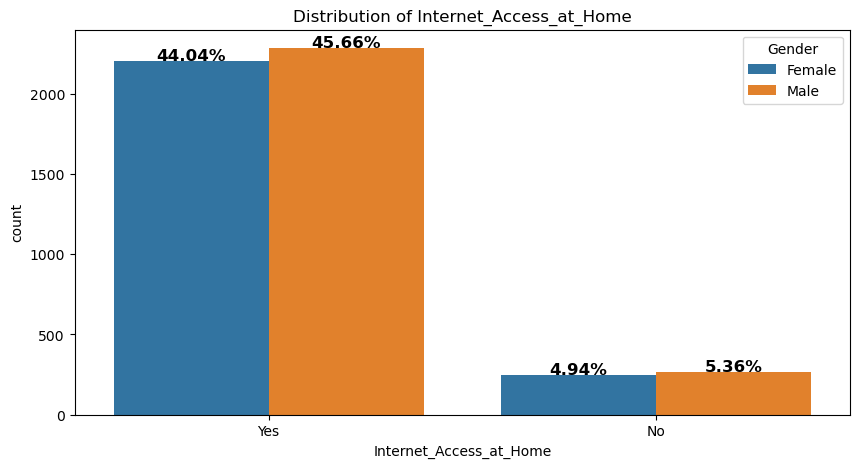

In [137]:
distribution_fig(df,'Internet_Access_at_Home',hue='Gender')

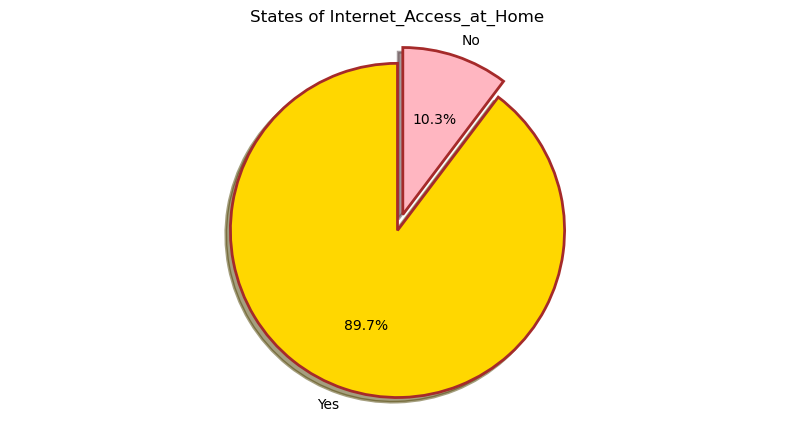

In [138]:
state_fig(df,'Internet_Access_at_Home')

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


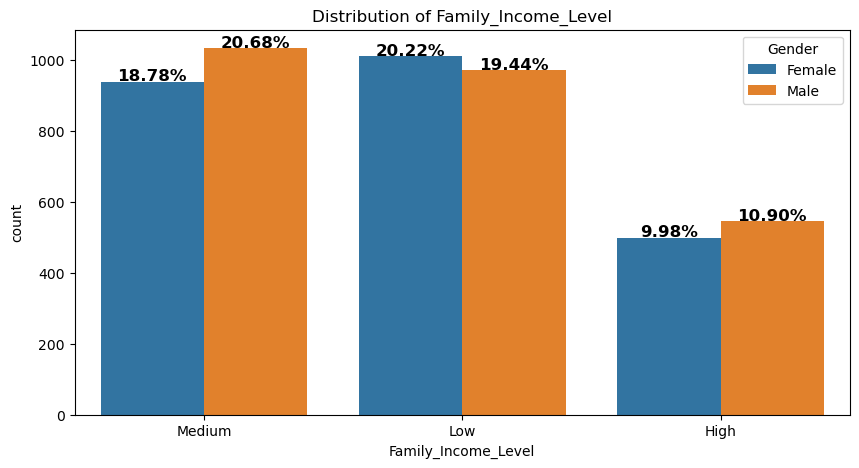

In [139]:
distribution_fig(df,'Family_Income_Level',hue='Gender')

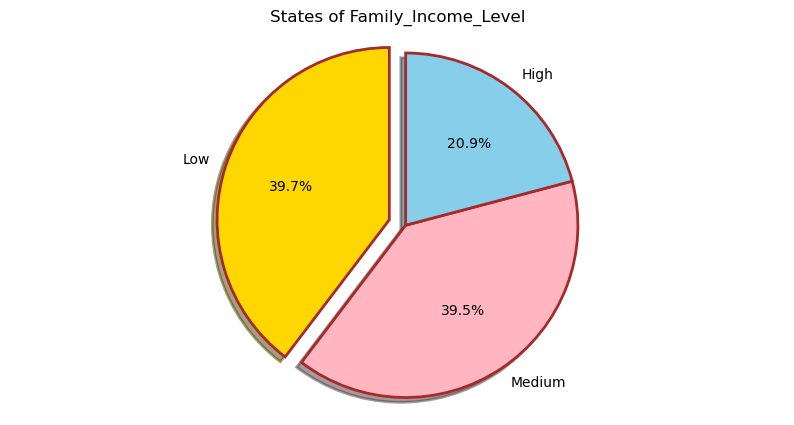

In [140]:
state_fig(df,'Family_Income_Level')

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


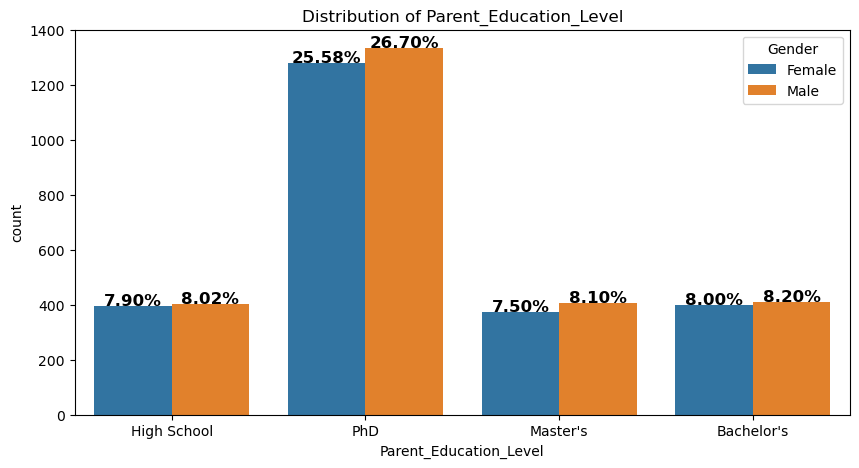

In [141]:
distribution_fig(df,'Parent_Education_Level',hue='Gender')

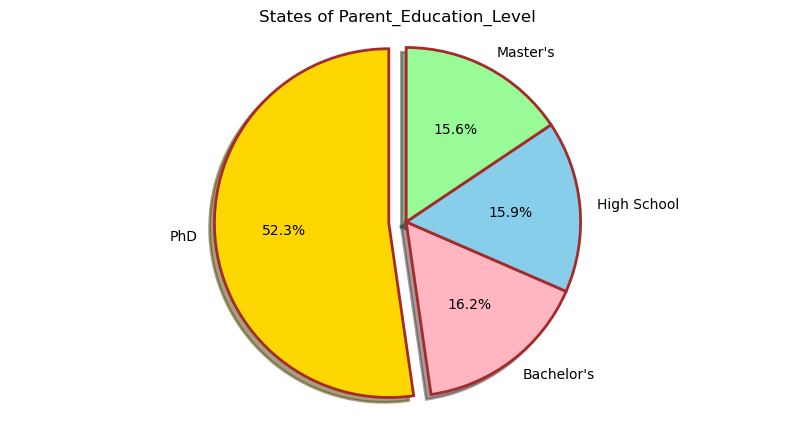

In [142]:
state_fig(df,'Parent_Education_Level')

**Complete With Numerical**

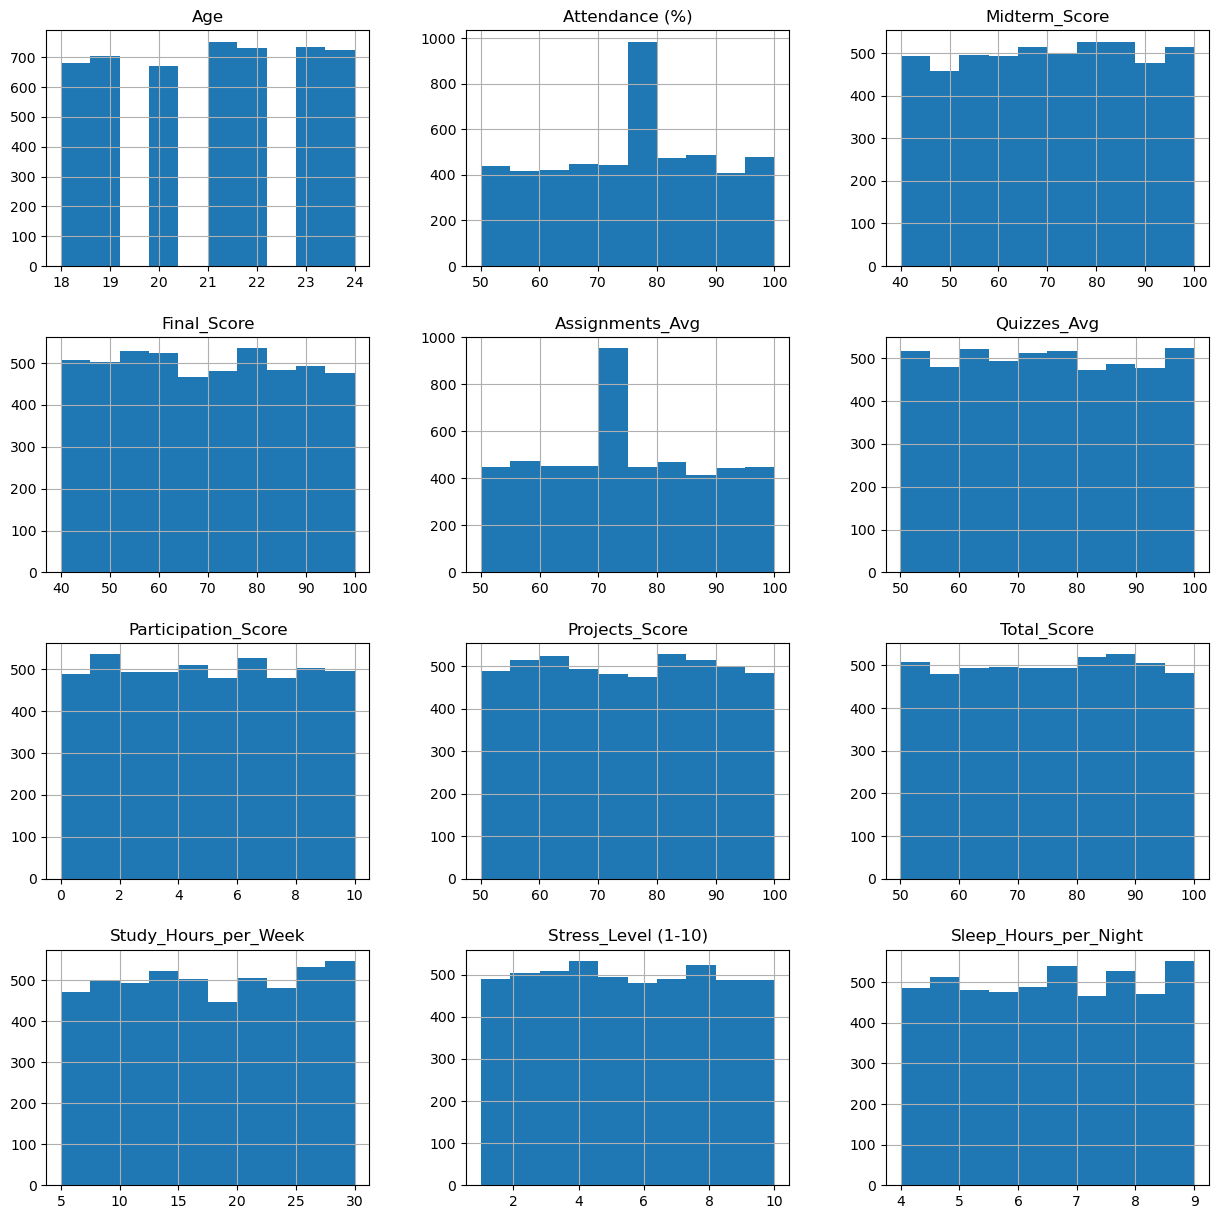

In [143]:
df.hist(figsize=(15,15))
plt.show()

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

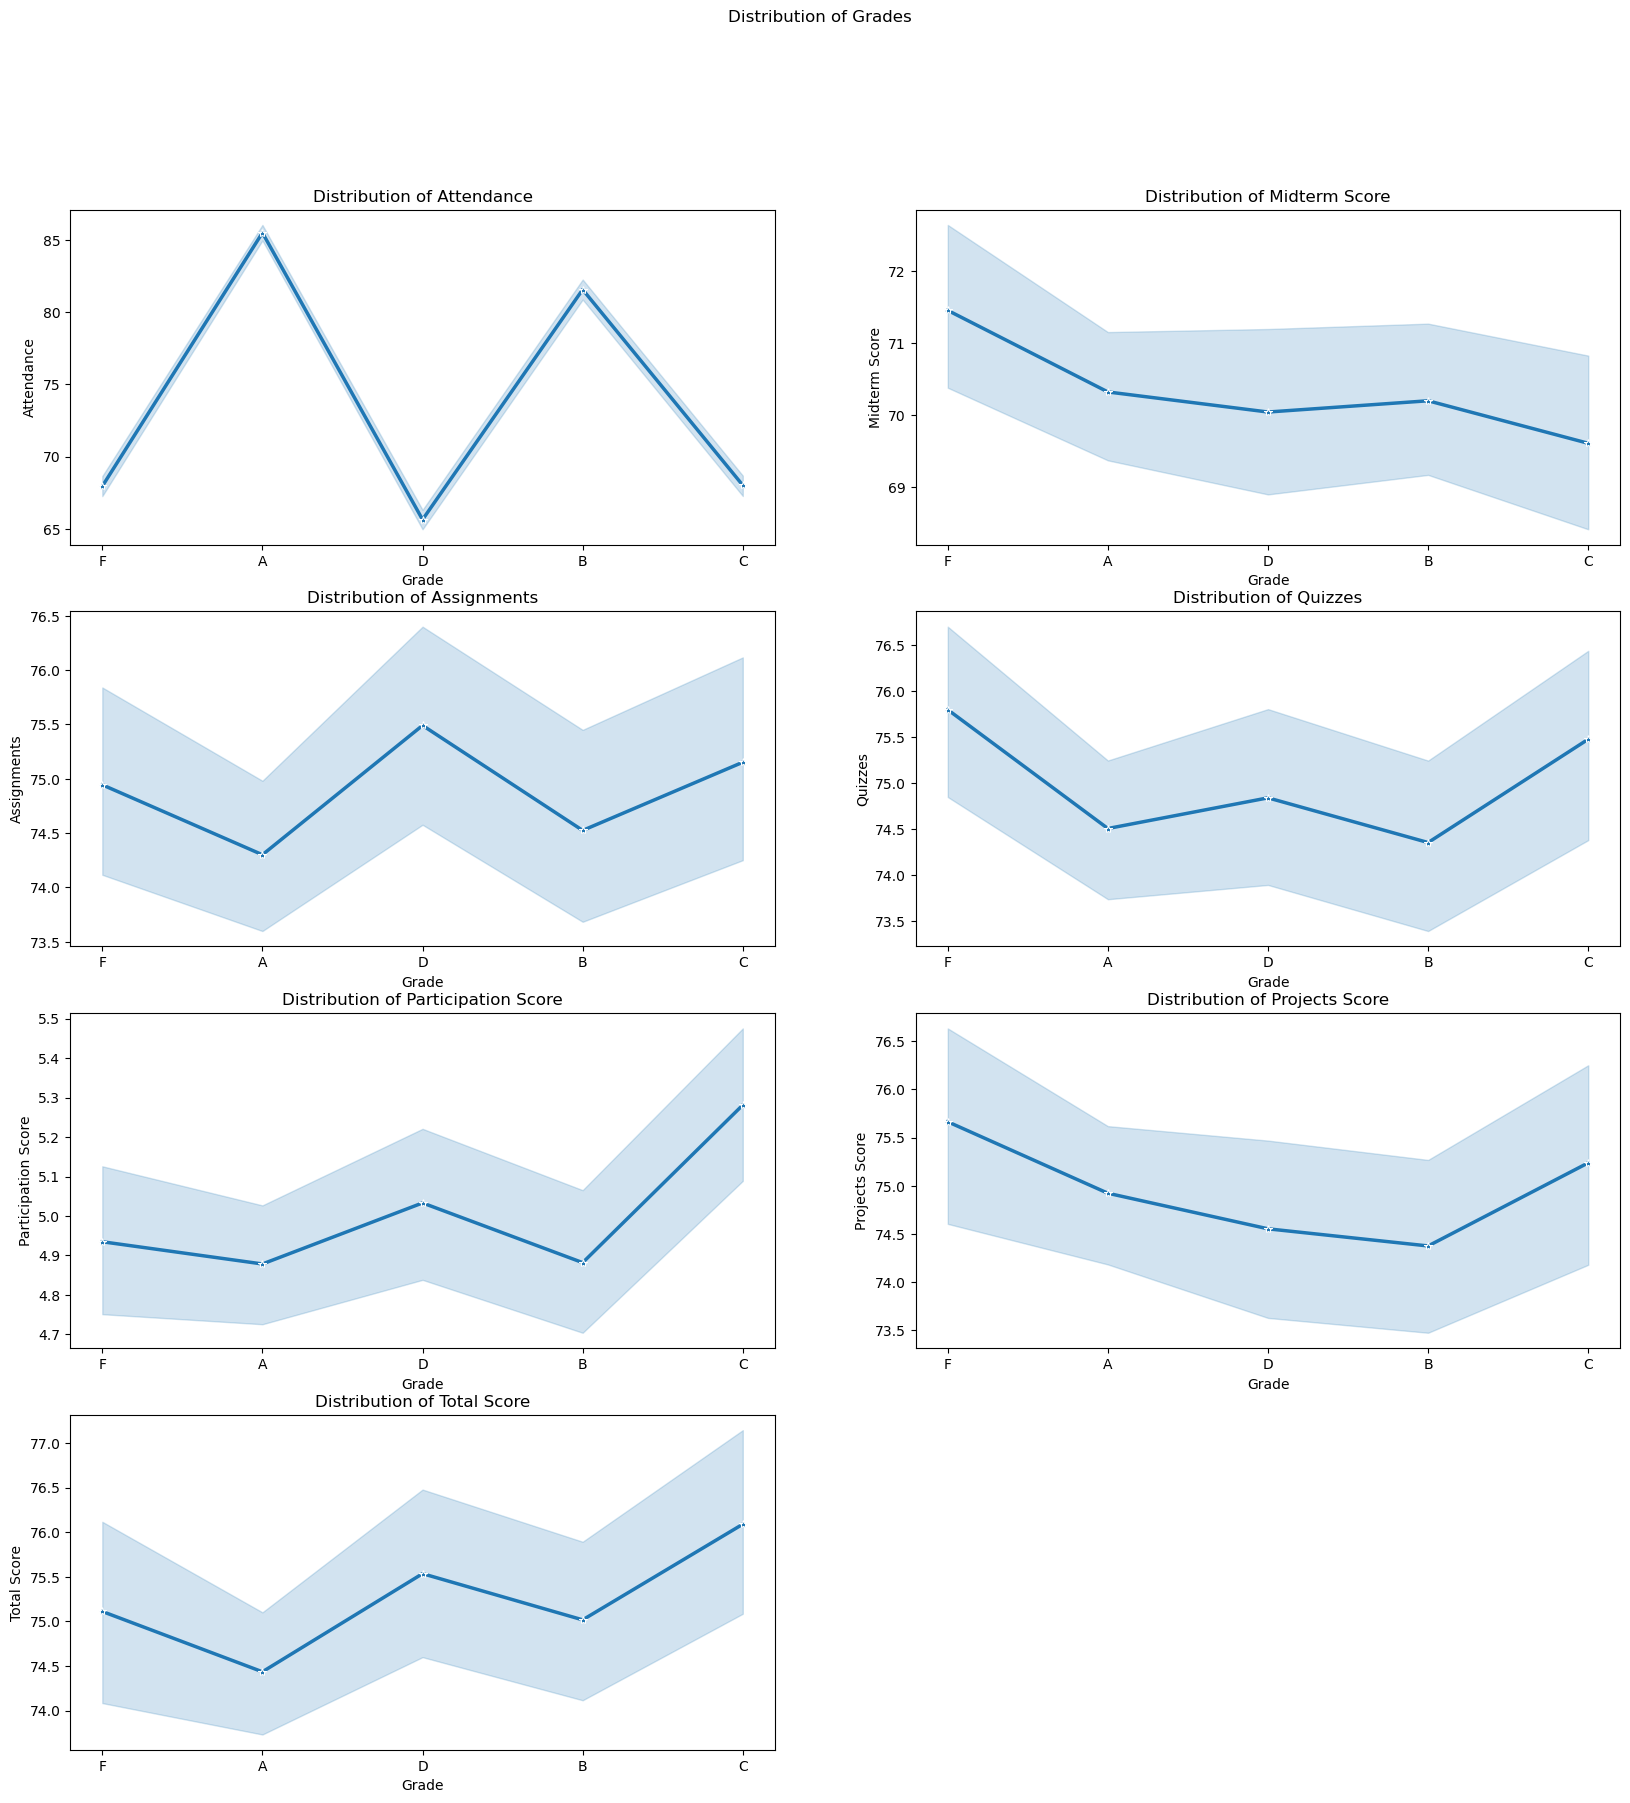

In [145]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.suptitle("Distribution of Grades")

sns.lineplot(df,x='Grade',y='Attendance (%)',marker='*',linewidth=2.5)
plt.title("Distribution of Attendance")
plt.xlabel("Grade")
plt.ylabel("Attendance")

plt.subplot(4,2,2)
sns.lineplot(df,x='Grade',y='Midterm_Score',marker='*',linewidth=2.5)
plt.title("Distribution of Midterm Score")
plt.ylabel("Midterm Score")

plt.subplot(4,2,3)
sns.lineplot(df,x='Grade',y='Assignments_Avg',marker='*',linewidth=2.5)
plt.title("Distribution of Assignments")
plt.ylabel("Assignments")

plt.subplot(4,2,4)
sns.lineplot(df,x='Grade',y='Quizzes_Avg',marker='*',linewidth=2.5)
plt.title("Distribution of Quizzes")
plt.ylabel("Quizzes")

plt.subplot(4,2,5)
sns.lineplot(df,x='Grade',y='Participation_Score',marker='*',linewidth=2.5)
plt.title("Distribution of Participation Score")
plt.ylabel("Participation Score")

plt.subplot(4,2,6)
sns.lineplot(df,x='Grade',y='Projects_Score',marker='*',linewidth=2.5)
plt.title("Distribution of Projects Score")
plt.ylabel("Projects Score")

plt.subplot(4,2,7)
sns.lineplot(df,x='Grade',y='Total_Score',marker='*',linewidth=2.5)
plt.title("Distribution of Total Score")
plt.ylabel("Total Score")

#plt.subplot(2,4,8)
#state_fig(df,'Grade')


plt.show()

In [146]:
def Preformance_std(df,x,name_fig):
    '''
        it's Function show Distributions for preformance of Students' Marks based on 'x'
    '''
    plt.figure(figsize=(20,20))
    plt.subplot(4,2,1)
    plt.suptitle(f"Distribution of {name_fig} vs all Marks")

    sns.lineplot(df,x=x,y='Attendance (%)',marker='*',linewidth=2.5)
    plt.title("Distribution of Attendance")
    plt.ylabel("Attendance")

    plt.subplot(4,2,2)
    sns.lineplot(df,x=x,y='Midterm_Score',marker='*',linewidth=2.5)
    plt.title("Distribution of Midterm Score")
    plt.ylabel("Midterm Score")

    plt.subplot(4,2,3)
    sns.lineplot(df,x=x,y='Assignments_Avg',marker='*',linewidth=2.5)
    plt.title("Distribution of Assignments")
    plt.ylabel("Assignments")

    plt.subplot(4,2,4)
    sns.lineplot(df,x=x,y='Quizzes_Avg',marker='*',linewidth=2.5)
    plt.title("Distribution of Quizzes")
    plt.ylabel("Quizzes")

    plt.subplot(4,2,5)
    sns.lineplot(df,x=x,y='Participation_Score',marker='*',linewidth=2.5)
    plt.title("Distribution of Participation Score")
    plt.ylabel("Participation Score")

    plt.subplot(4,2,6)
    sns.lineplot(df,x=x,y='Projects_Score',marker='*',linewidth=2.5)
    plt.title("Distribution of Projects Score")
    plt.ylabel("Projects Score")

    plt.subplot(4,2,7)
    sns.lineplot(df,x=x,y='Total_Score',marker='*',linewidth=2.5)
    plt.title("Distribution of Total Score")
    plt.ylabel("Total Score")

    plt.show()

    plt.figure(figsize=(20,5))
    countplot_ratio(df,x=x,hue='Grade')
    plt.show()

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

# **EDA for Performance**

In [148]:
obj_list = df.select_dtypes('object').columns
obj_list

Index(['Gender', 'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level'],
      dtype='object')

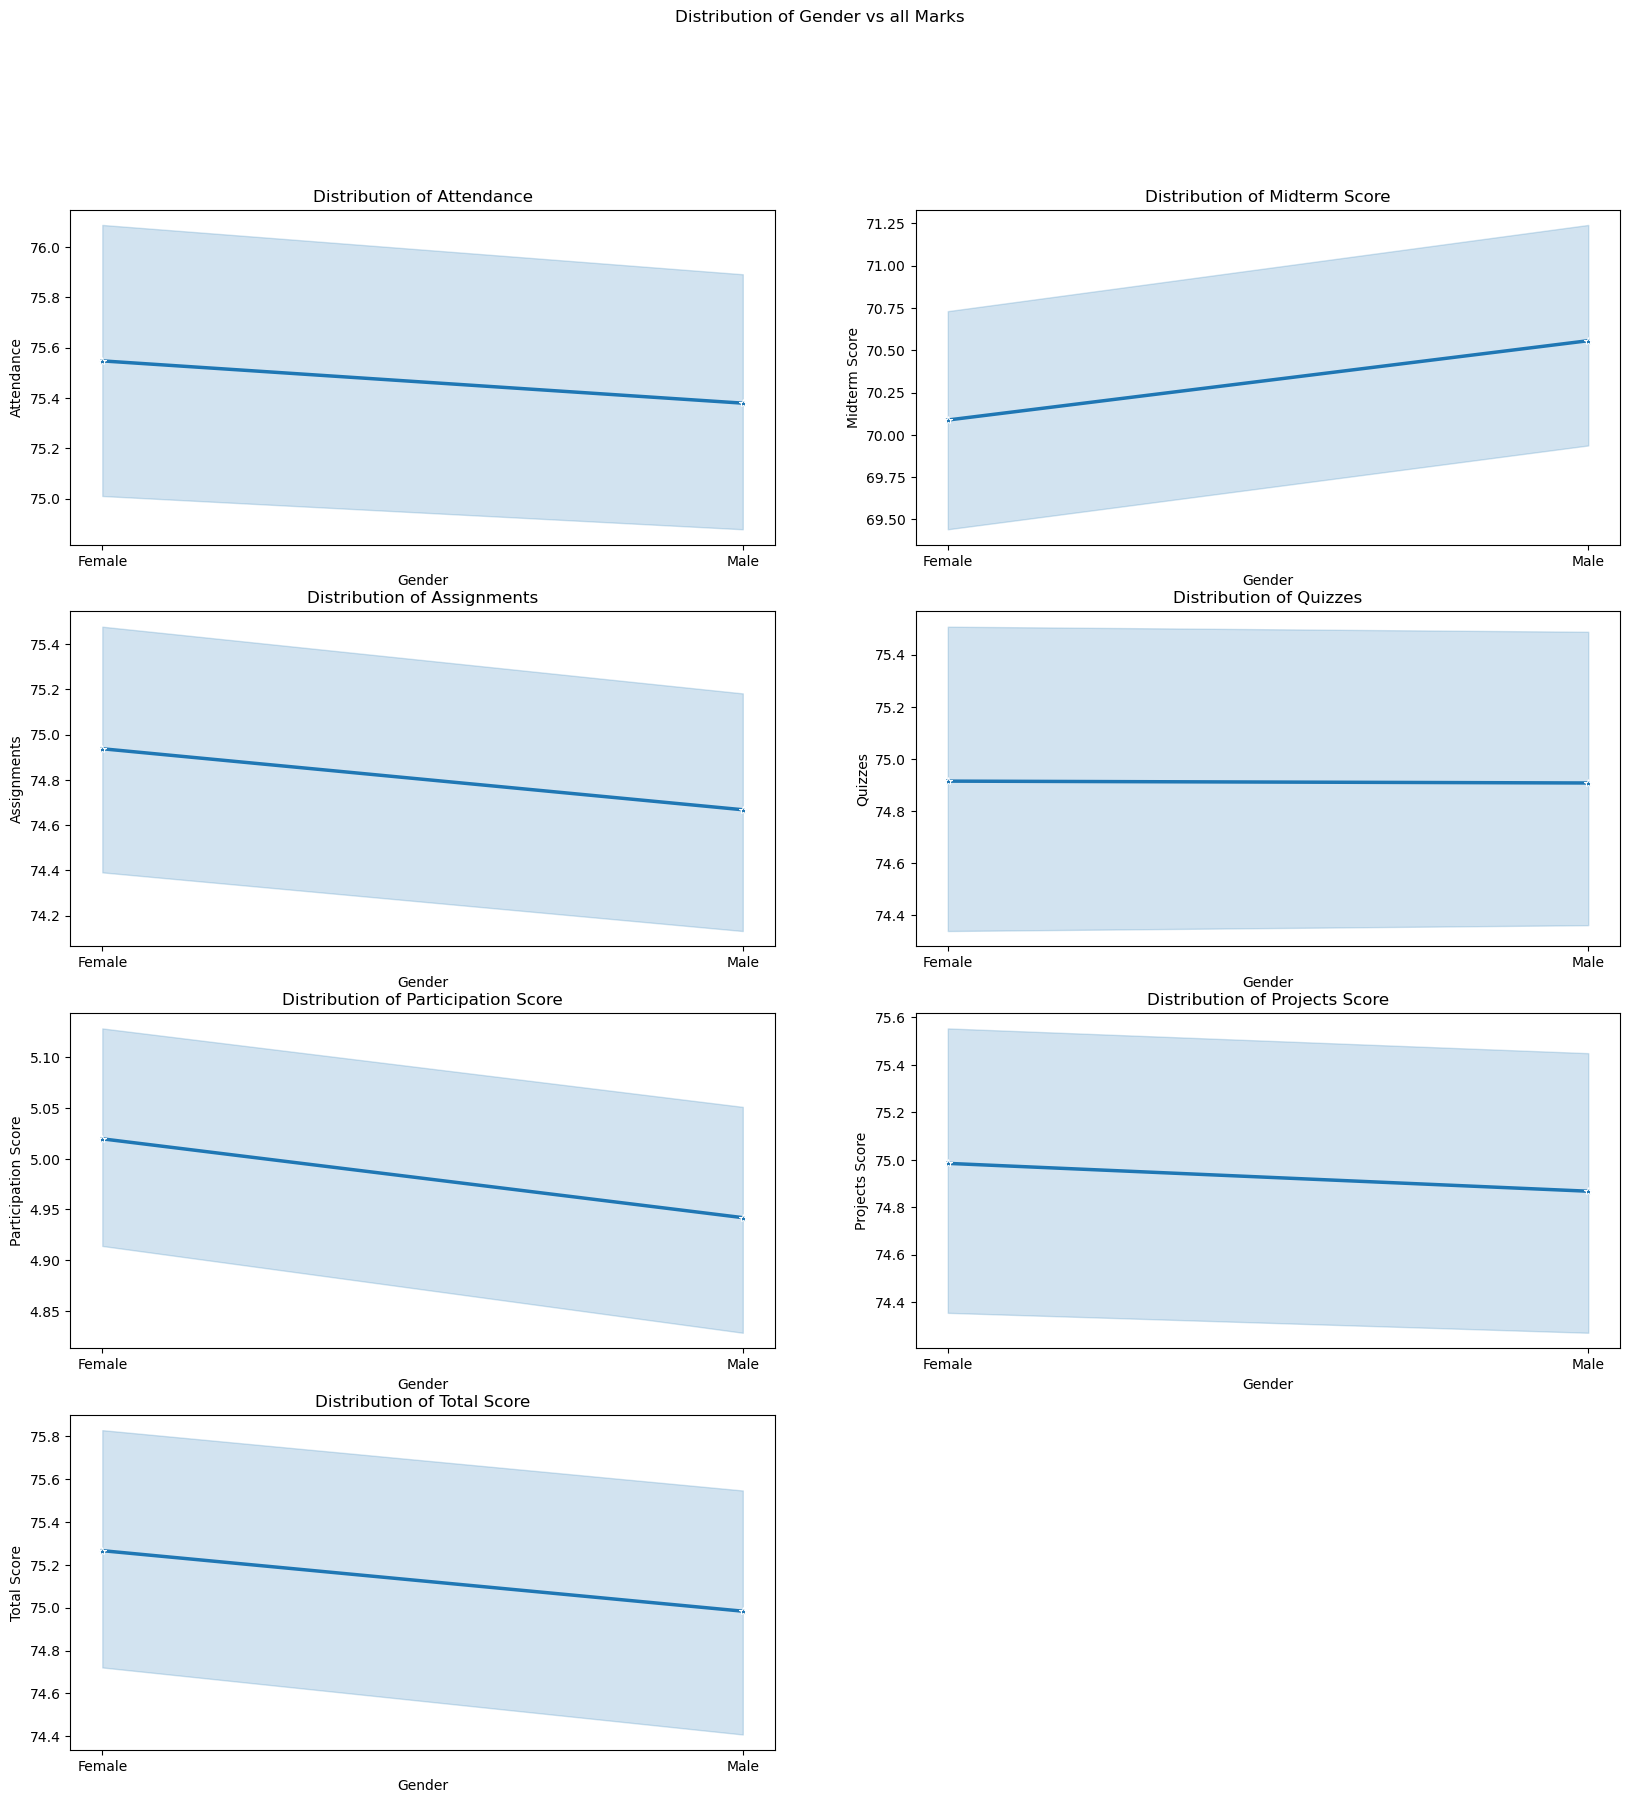

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


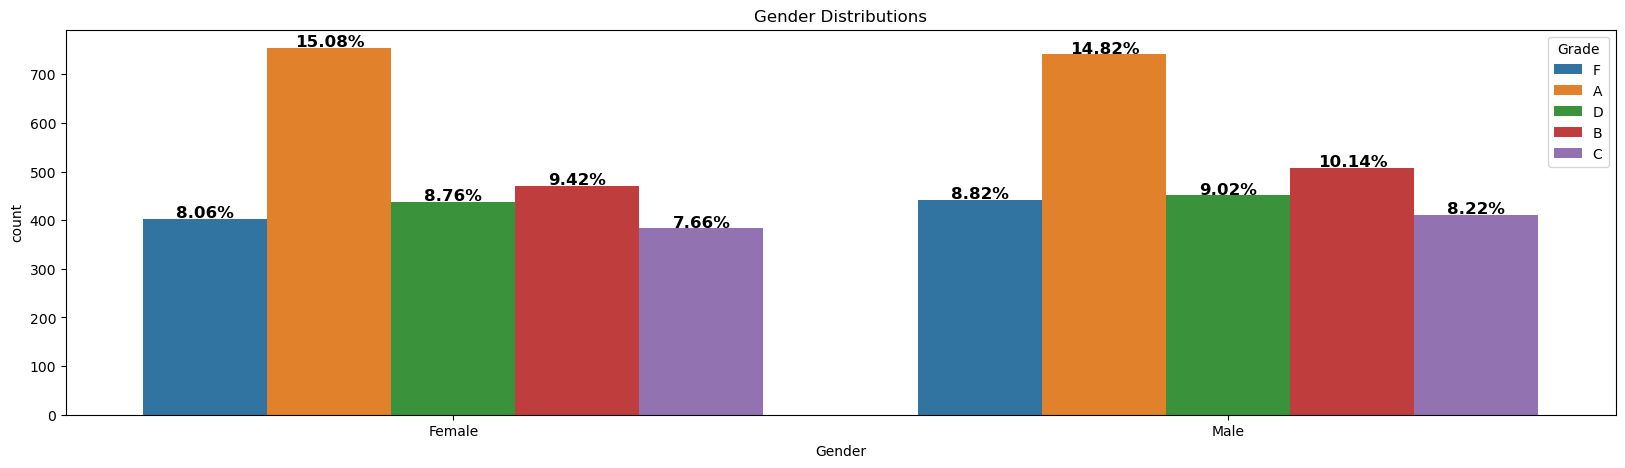

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\1801329922.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[['Attendance (%)','Midterm_Score', 'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score']].agg(np.mean))


        Attendance (%)  Midterm_Score  Assignments_Avg  Quizzes_Avg  \
Gender                                                                
Female       75.547399      70.087624        74.937321    74.914349   
Male         75.379443      70.556499        74.667864    74.907252   

        Participation_Score  Projects_Score  Total_Score  
Gender                                                    
Female             5.019669       74.984720    75.265762  
Male               4.941964       74.867393    74.983603  


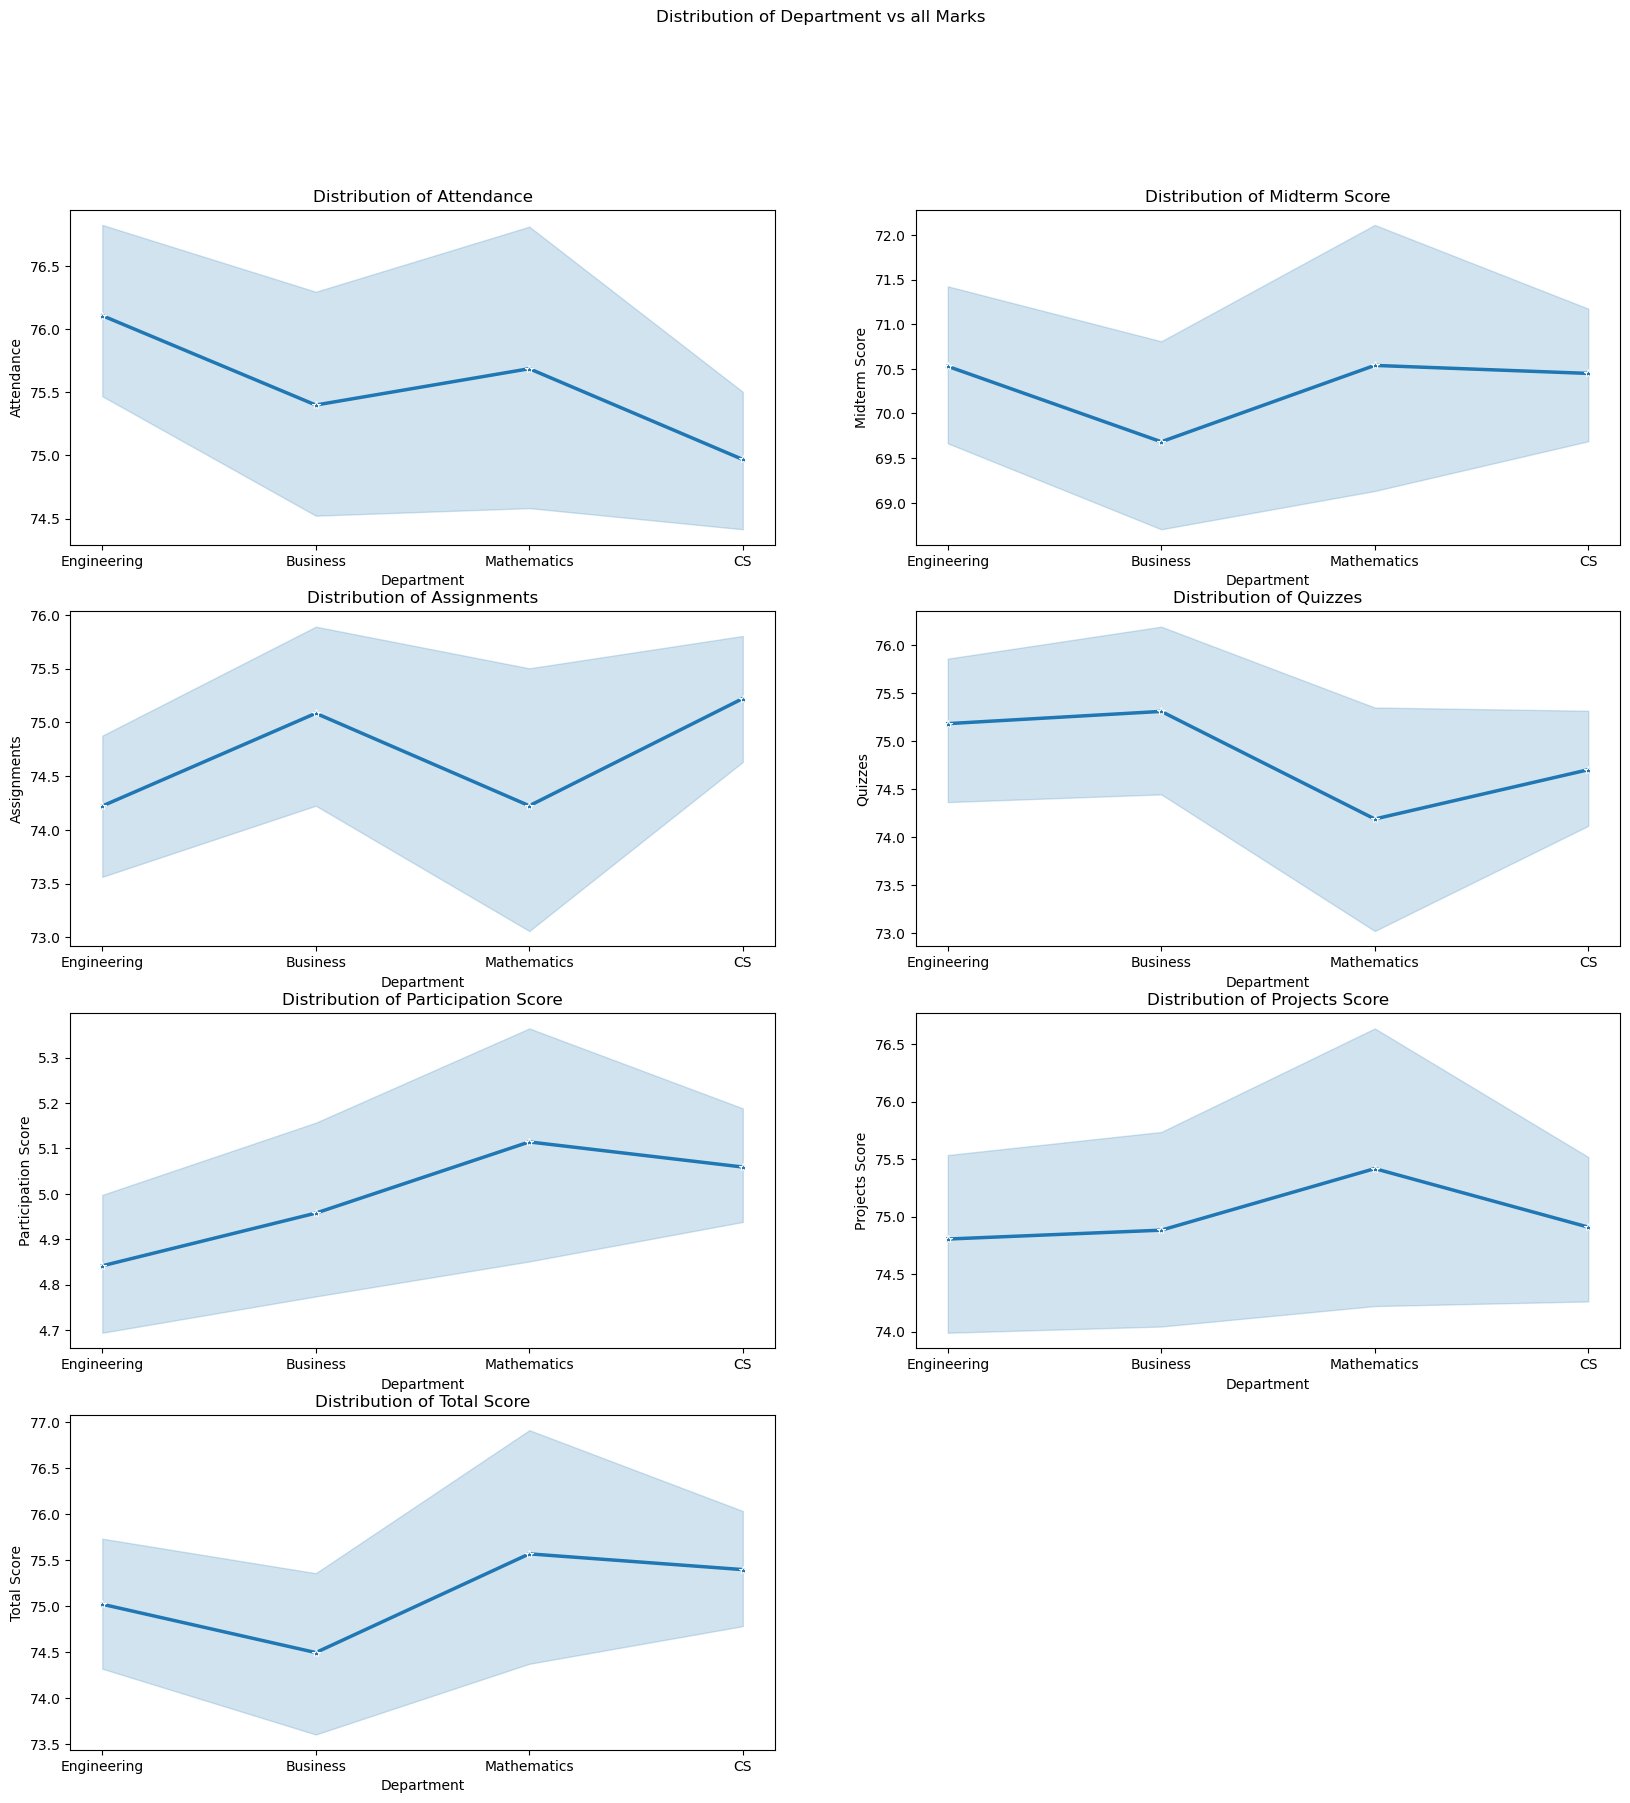

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


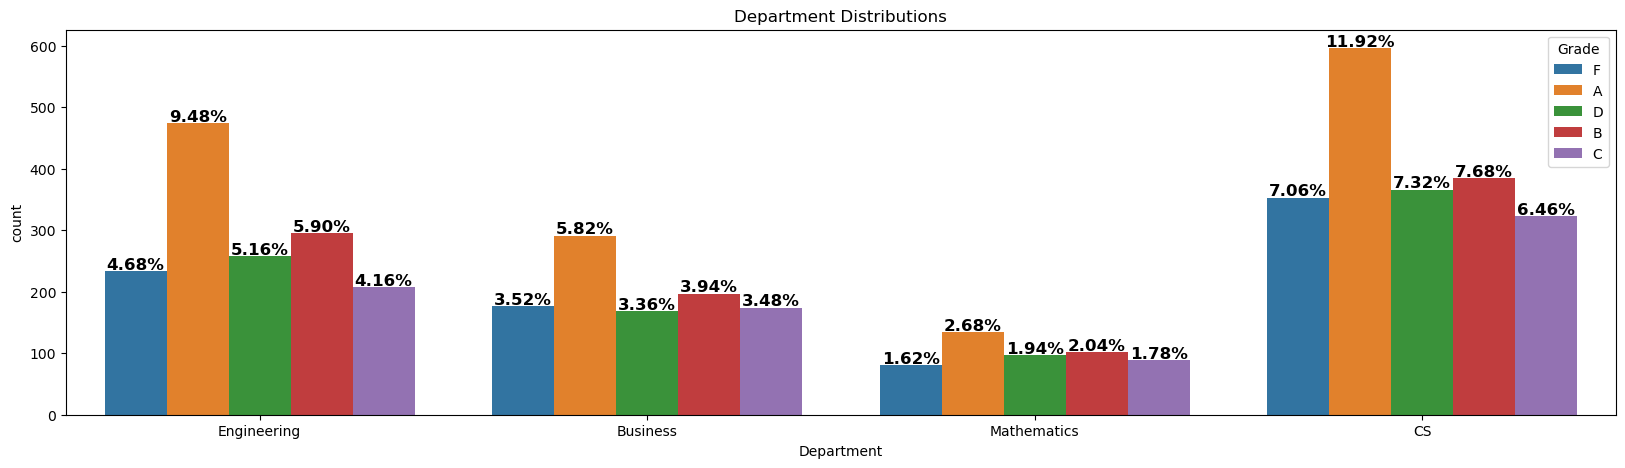

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\1801329922.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[['Attendance (%)','Midterm_Score', 'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score']].agg(np.mean))


             Attendance (%)  Midterm_Score  Assignments_Avg  Quizzes_Avg  \
Department                                                                 
Business          75.399185      69.683161        75.084473    75.306899   
CS                74.968136      70.448595        75.221795    74.698937   
Engineering       76.106841      70.527692        74.221423    75.179265   
Mathematics       75.686759      70.538211        74.223658    74.185507   

             Participation_Score  Projects_Score  Total_Score  
Department                                                     
Business                4.957286       74.882972    74.495060  
CS                      5.058803       74.909491    75.396612  
Engineering             4.841259       74.805800    75.020088  
Mathematics             5.114076       75.418131    75.567654  


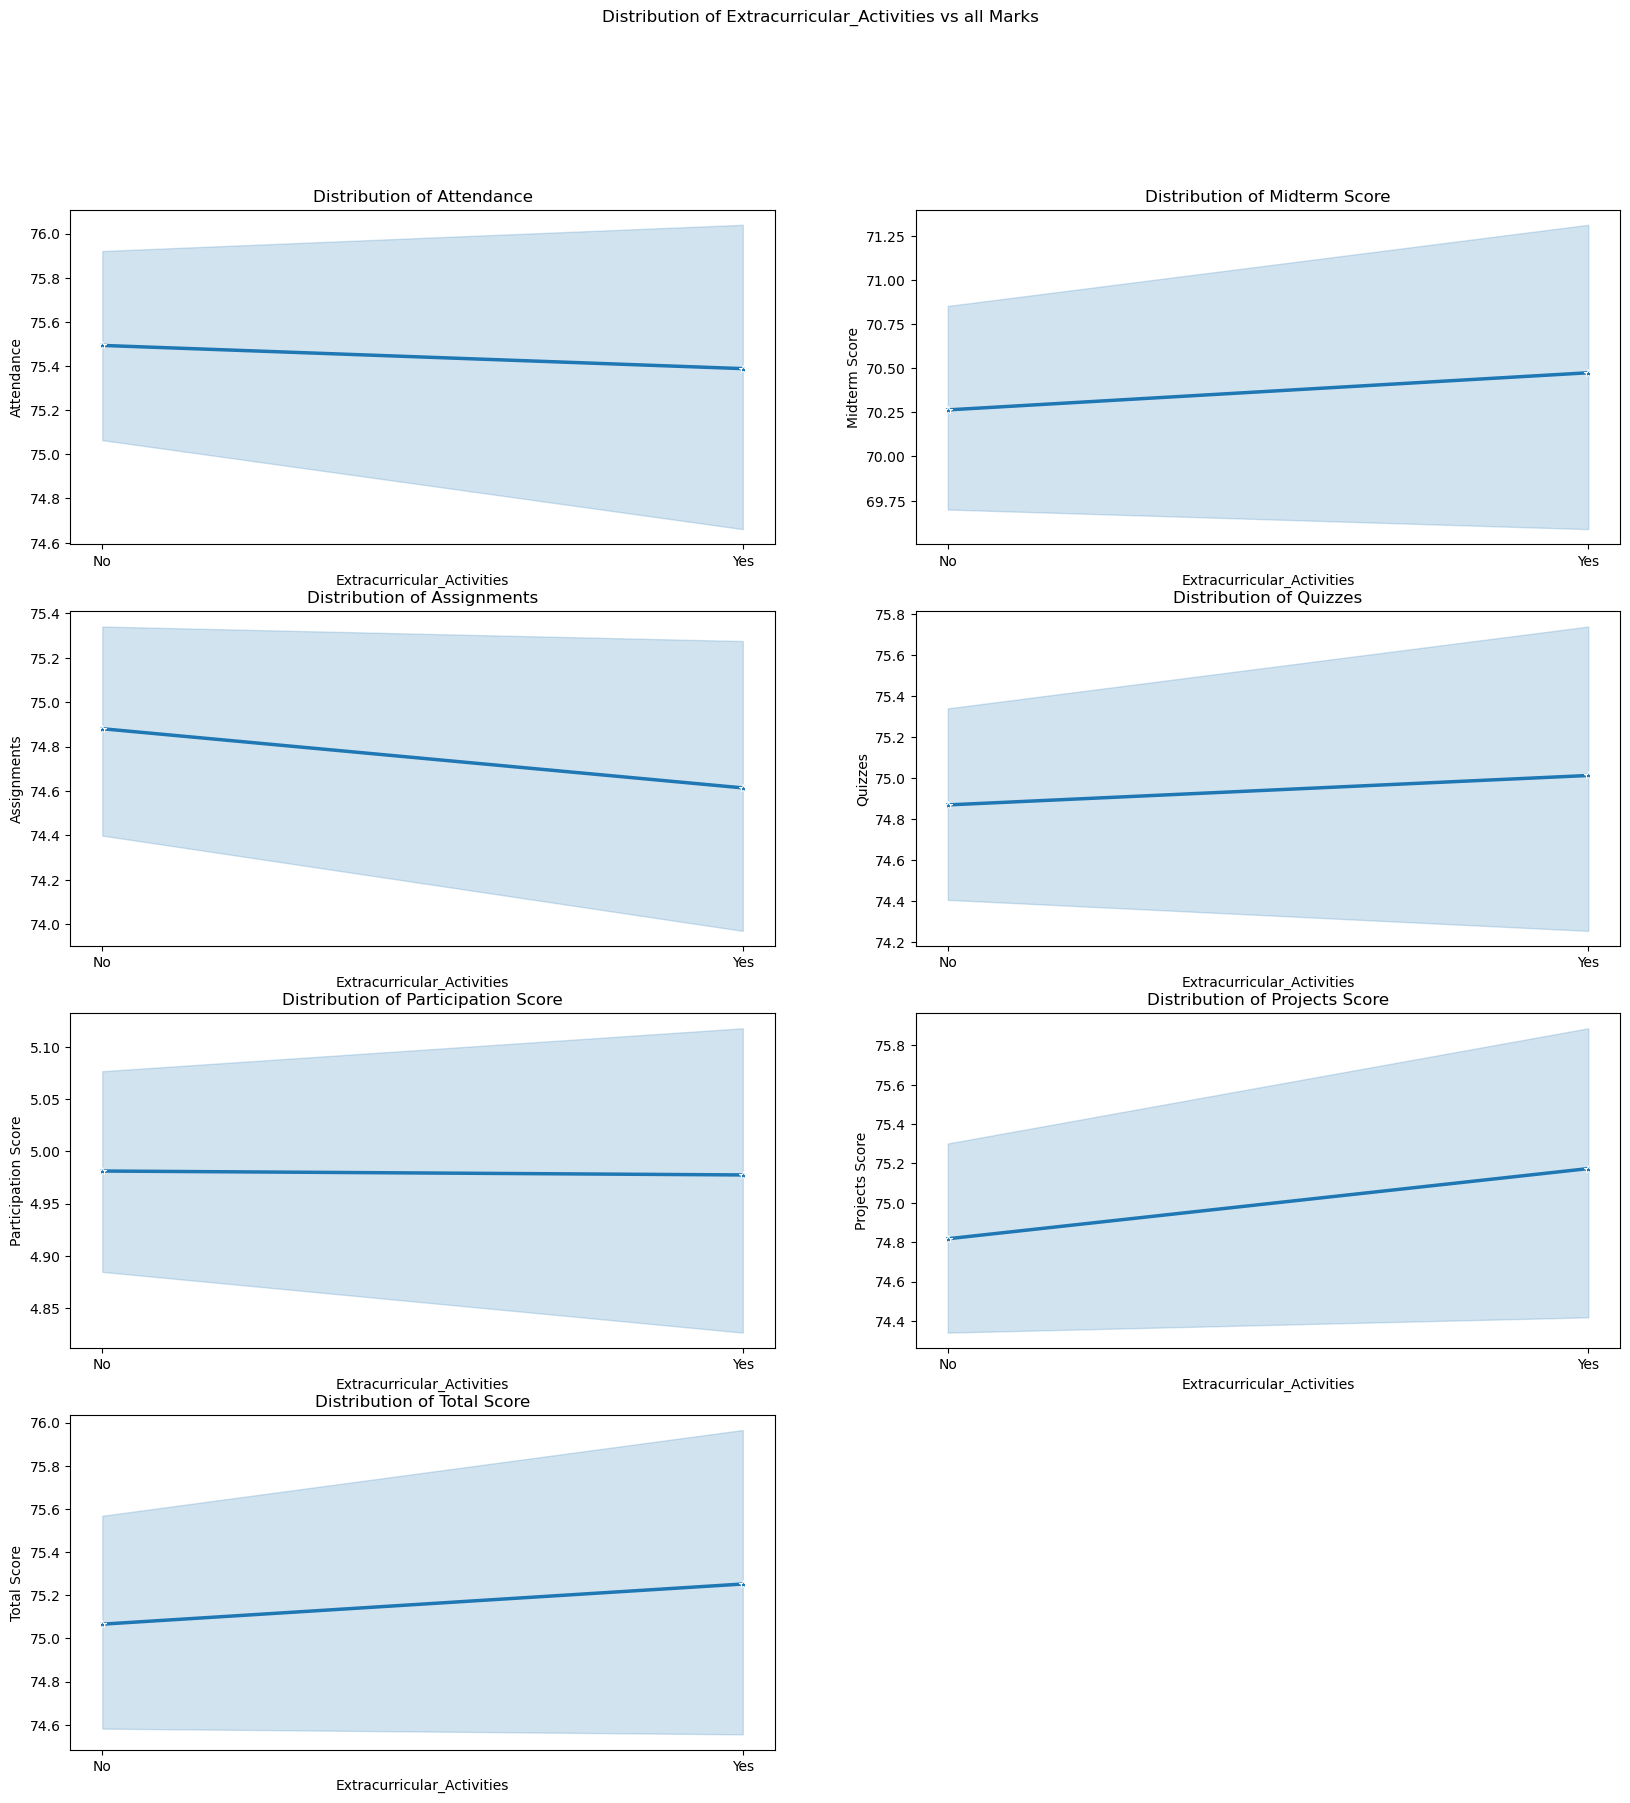

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


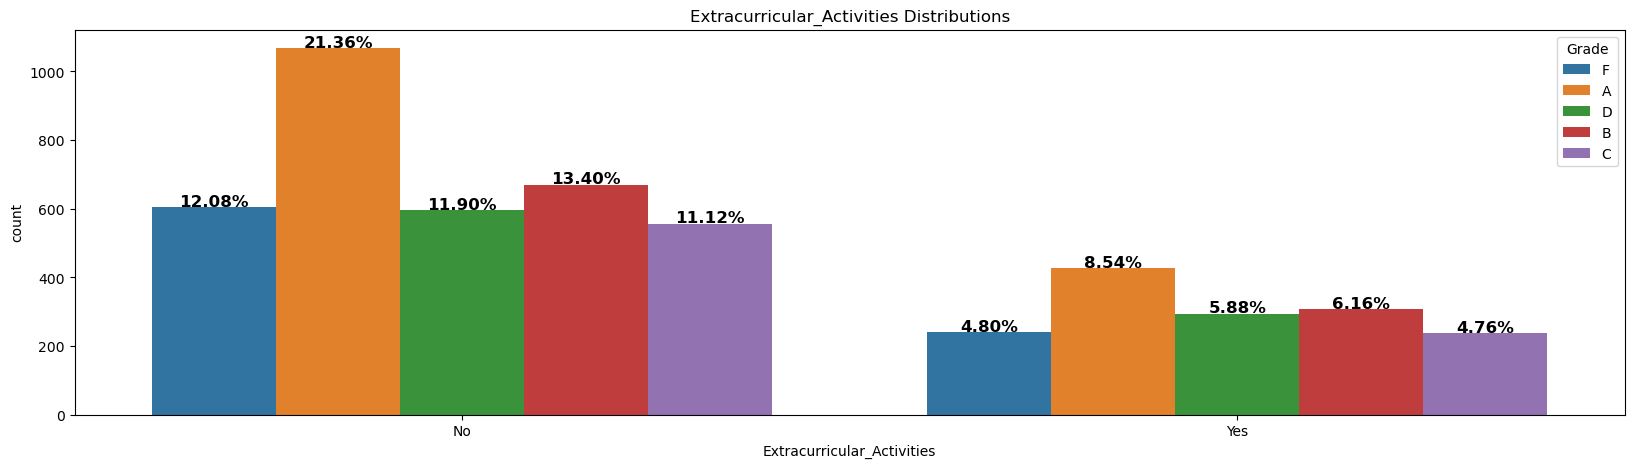

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\1801329922.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[['Attendance (%)','Midterm_Score', 'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score']].agg(np.mean))


                            Attendance (%)  Midterm_Score  Assignments_Avg  \
Extracurricular_Activities                                                   
No                               75.493407      70.263470        74.880040   
Yes                              75.388235      70.473736        74.613962   

                            Quizzes_Avg  Participation_Score  Projects_Score  \
Extracurricular_Activities                                                     
No                            74.867461             4.981154       74.817375   
Yes                           75.011015             4.977405       75.173995   

                            Total_Score  
Extracurricular_Activities               
No                            75.065723  
Yes                           75.251792  


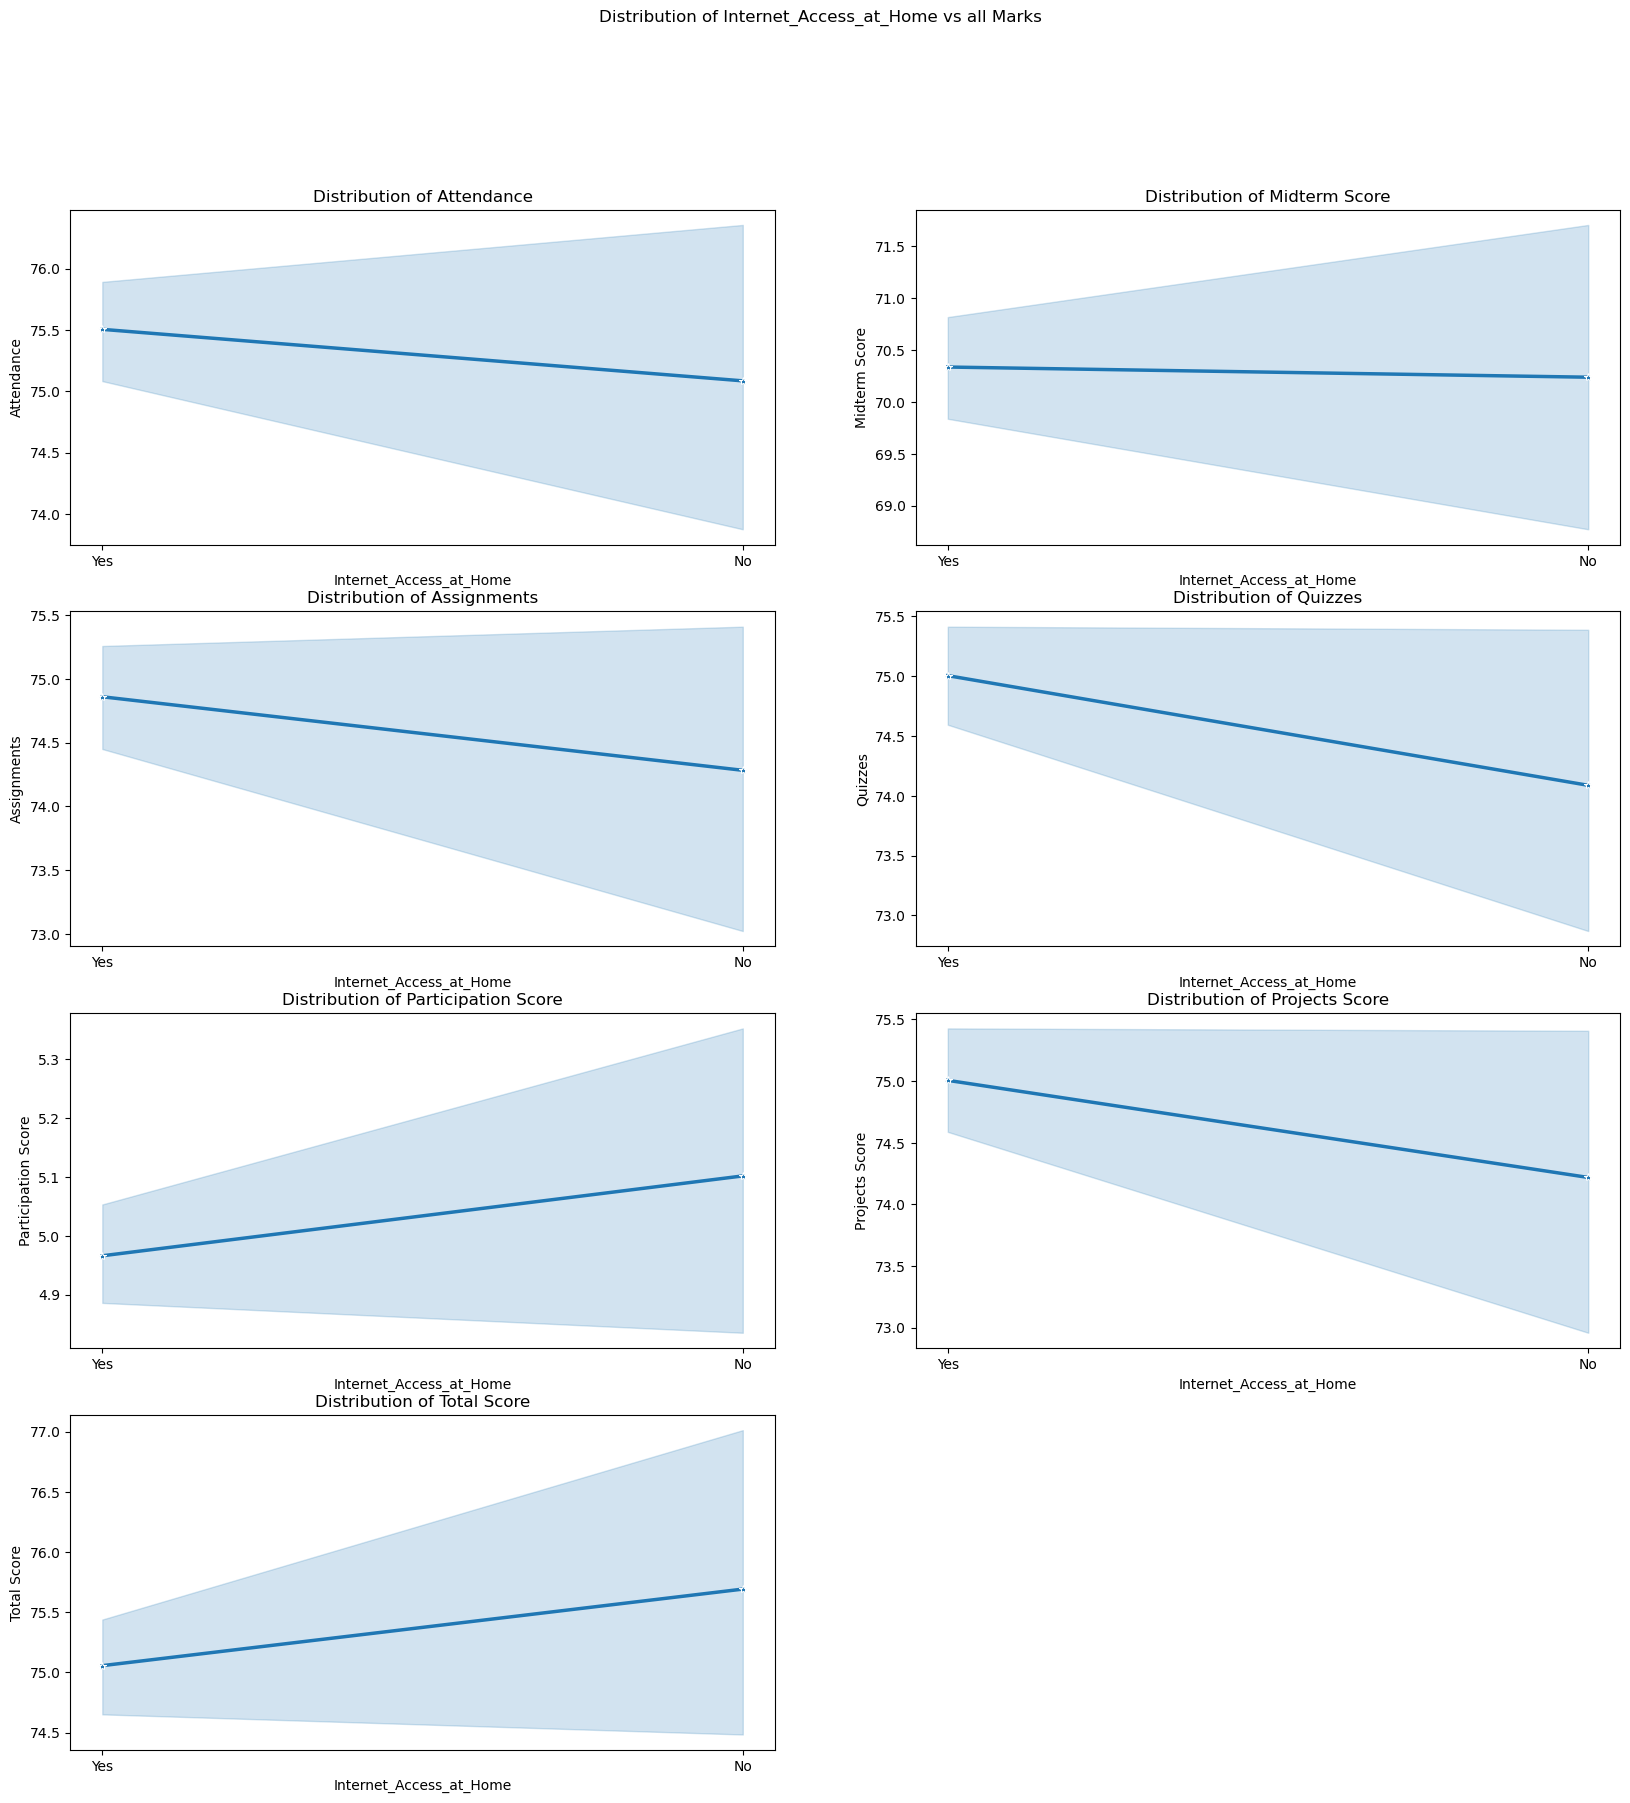

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


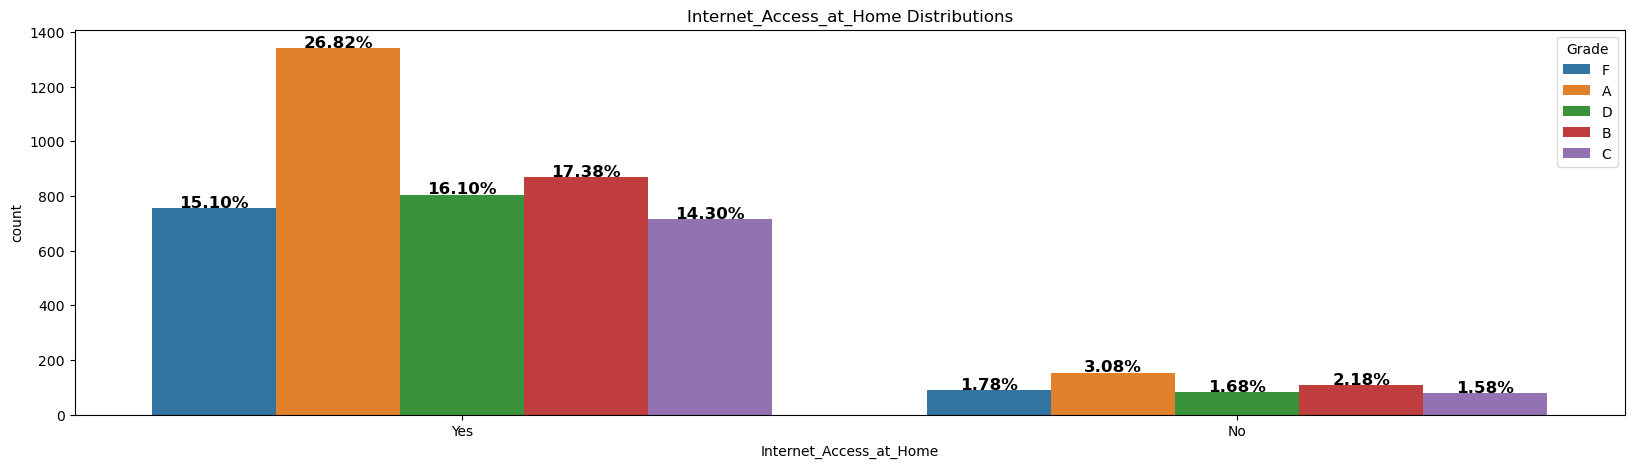

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\1801329922.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[['Attendance (%)','Midterm_Score', 'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score']].agg(np.mean))


                         Attendance (%)  Midterm_Score  Assignments_Avg  \
Internet_Access_at_Home                                                   
No                            75.084951      70.238835        74.283068   
Yes                           75.504970      70.336950        74.859184   

                         Quizzes_Avg  Participation_Score  Projects_Score  \
Internet_Access_at_Home                                                     
No                         74.088136             5.101709       74.218291   
Yes                        75.005184             4.966051       75.005993   

                         Total_Score  
Internet_Access_at_Home               
No                         75.692291  
Yes                        75.056297  


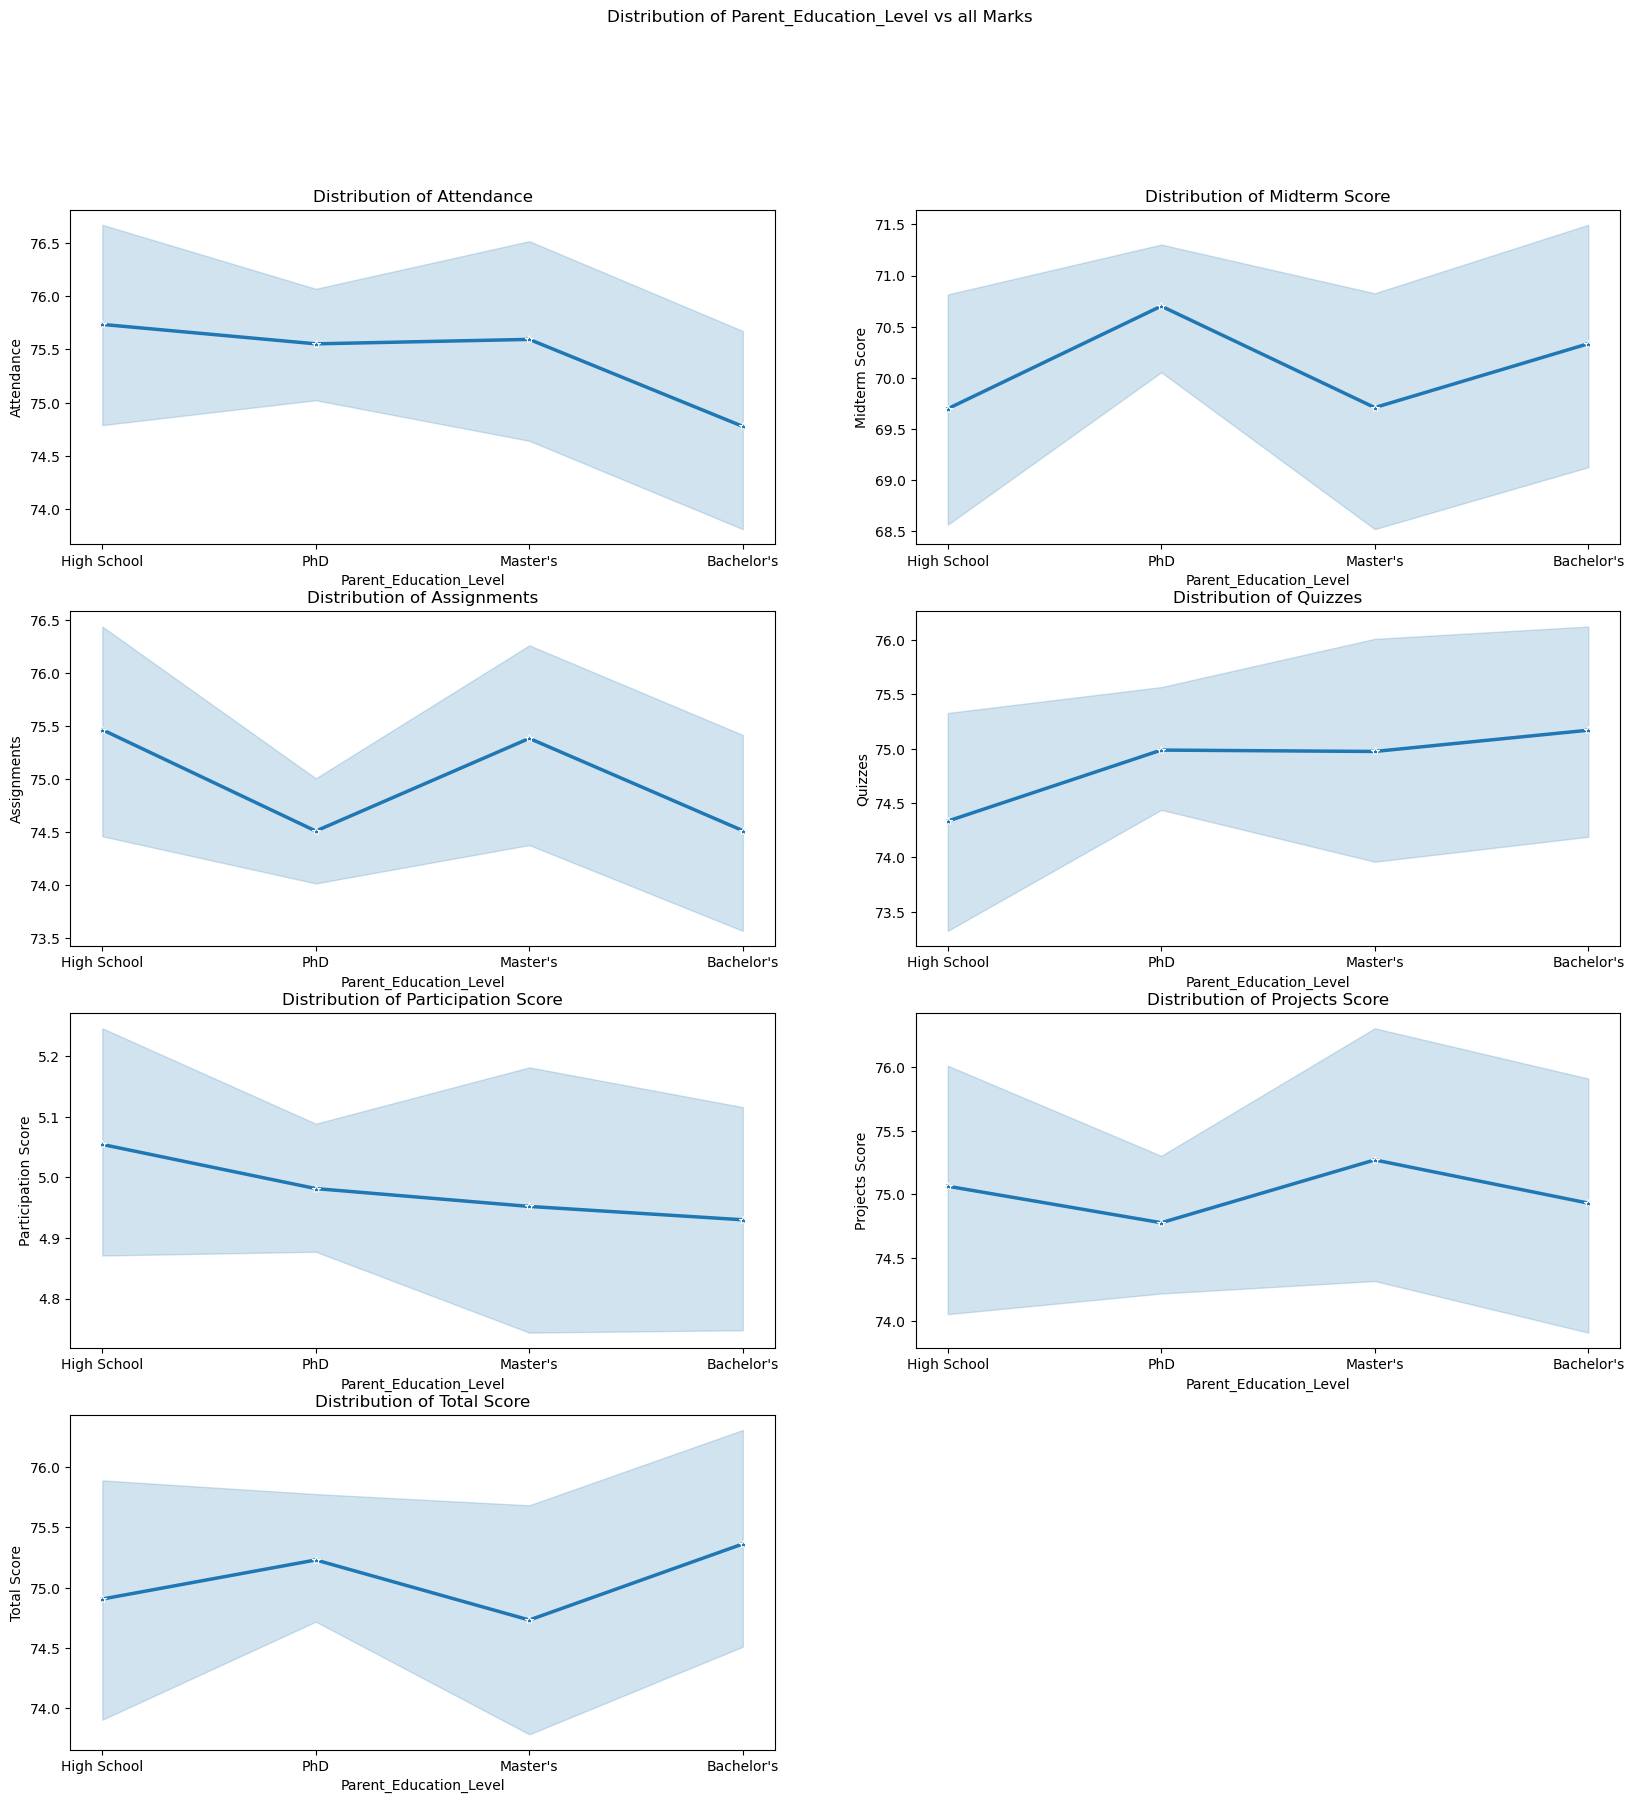

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


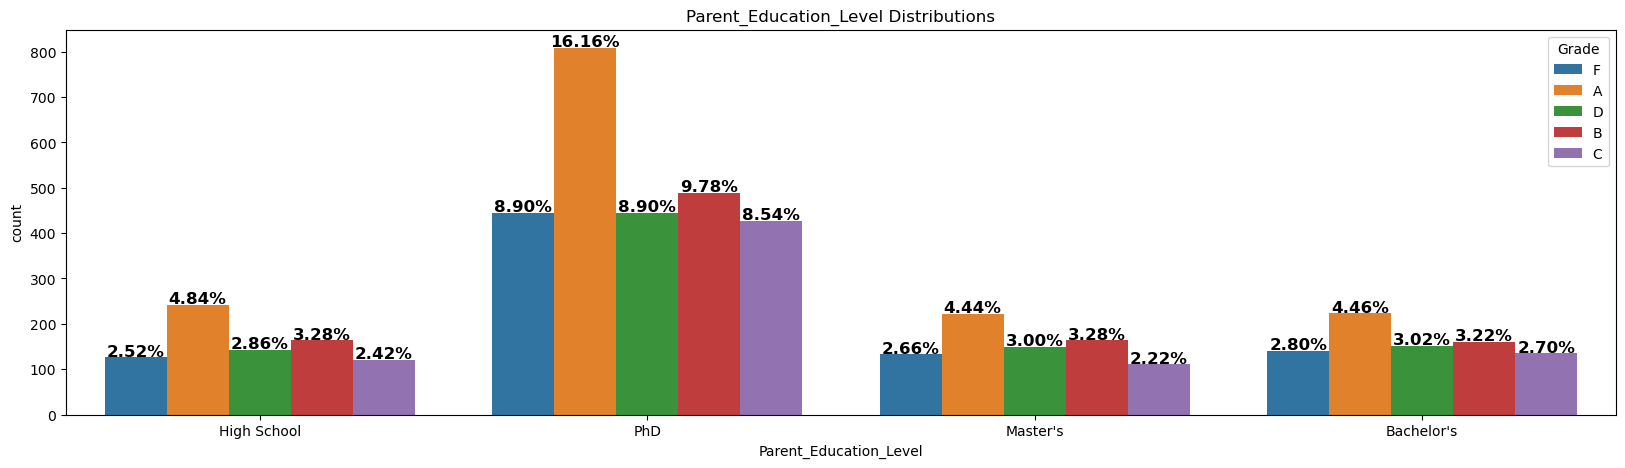

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\1801329922.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[['Attendance (%)','Midterm_Score', 'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score']].agg(np.mean))


                        Attendance (%)  Midterm_Score  Assignments_Avg  \
Parent_Education_Level                                                   
Bachelor's                   74.776858      70.333062        74.514432   
High School                  75.734108      69.697601        75.466595   
Master's                     75.593442      69.708705        75.384962   
PhD                          75.551664      70.700979        74.510654   

                        Quizzes_Avg  Participation_Score  Projects_Score  \
Parent_Education_Level                                                     
Bachelor's                75.170111             4.929889       74.931333   
High School               74.333379             5.054183       75.064259   
Master's                  74.974423             4.951936       75.271179   
PhD                       74.987158             4.981358       74.777066   

                        Total_Score  
Parent_Education_Level               
Bachelor's            

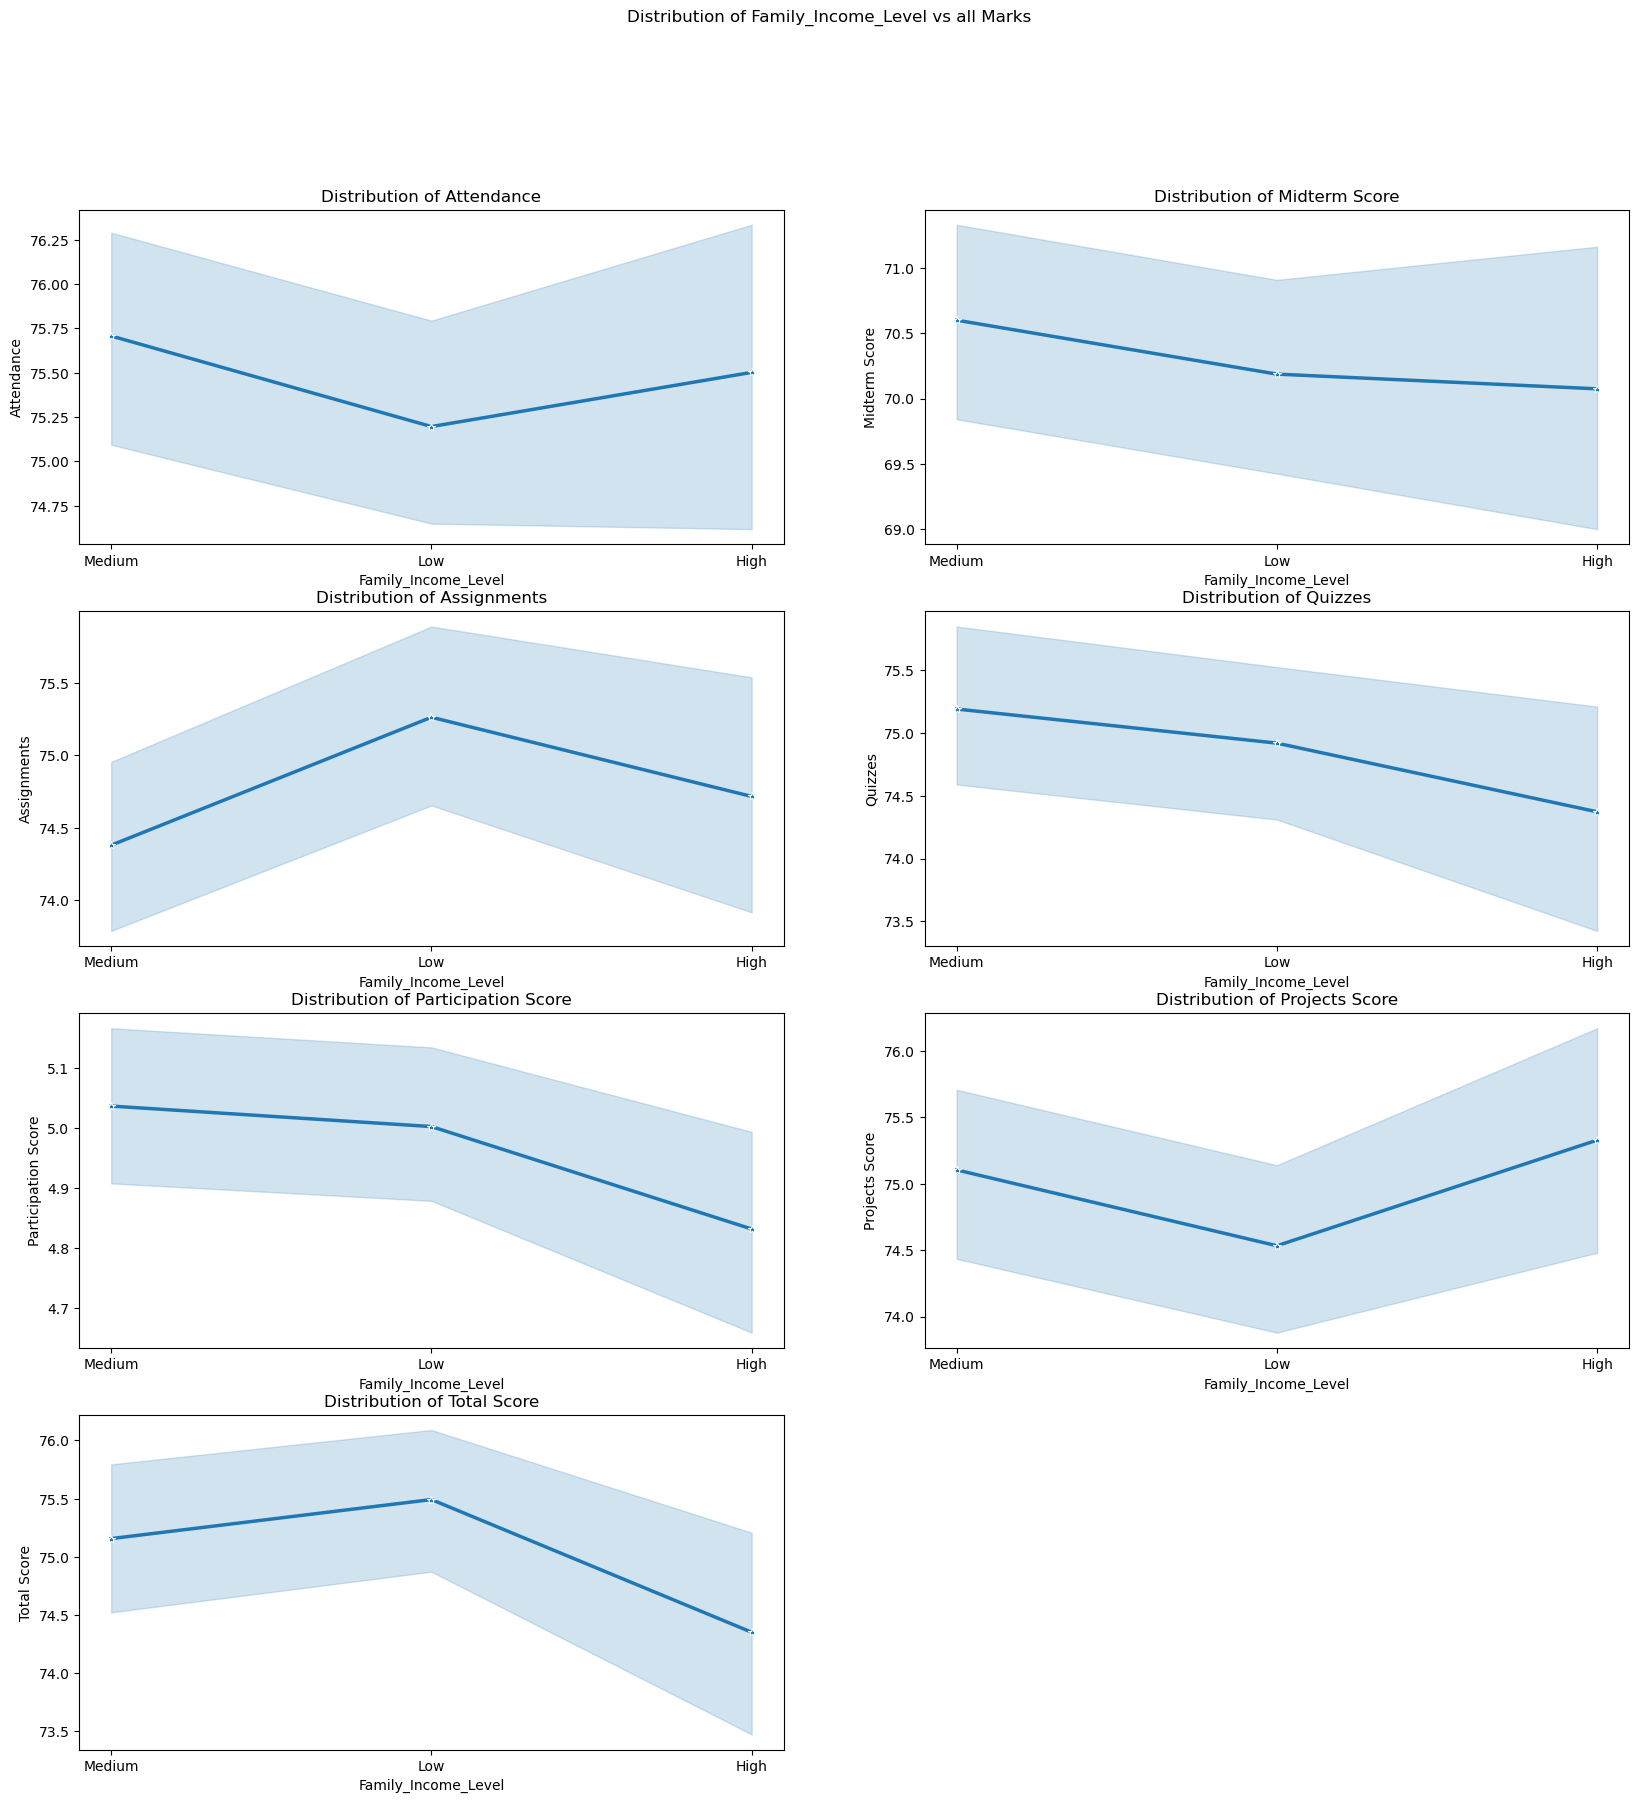

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


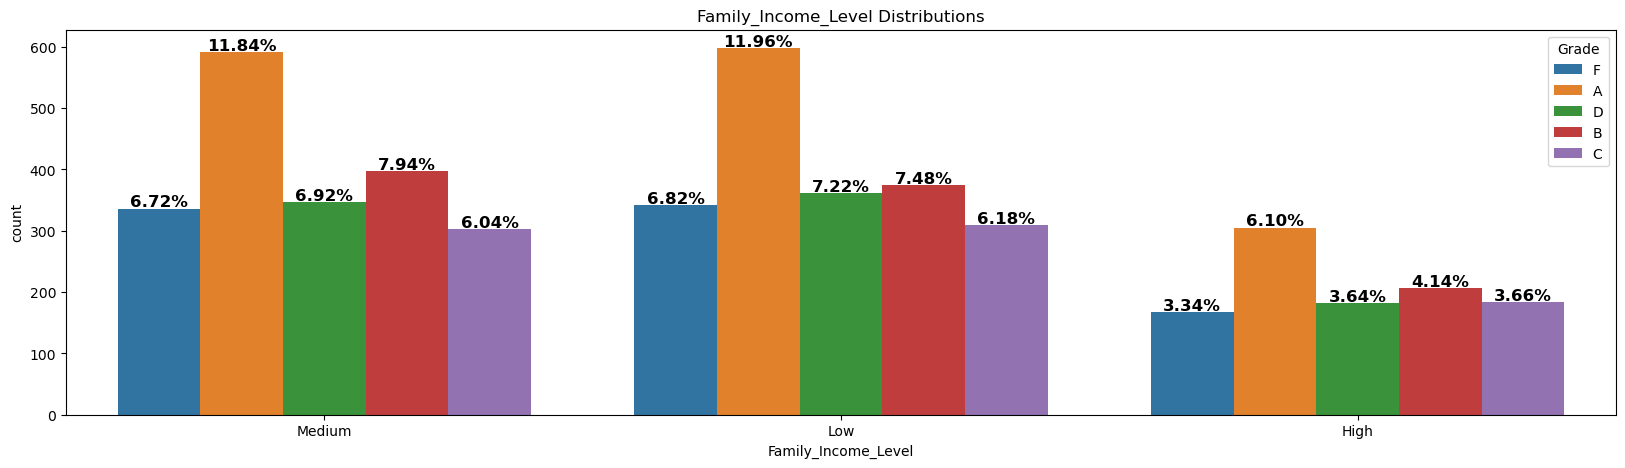

                     Attendance (%)  Midterm_Score  Assignments_Avg  \
Family_Income_Level                                                   
High                      75.501796      70.074397        74.715891   
Low                       75.196357      70.187282        75.262017   
Medium                    75.707192      70.600694        74.379752   

                     Quizzes_Avg  Participation_Score  Projects_Score  \
Family_Income_Level                                                     
High                   74.371533             4.831341       75.328985   
Low                    74.917630             5.002219       74.533127   
Medium                 75.189103             5.036391       75.104739   

                     Total_Score  
Family_Income_Level               
High                   74.352510  
Low                    75.492063  
Medium                 75.156736  


C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\1801329922.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[['Attendance (%)','Midterm_Score', 'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score']].agg(np.mean))


In [149]:
for i in obj_list:
    if(i != 'Grade'):
        Preformance_std(df,i,i)
        print(df.groupby(i)[['Attendance (%)','Midterm_Score', 'Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score']].agg(np.mean))

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

# **EDA for Behaver**

In [151]:
behaver_list = ['Study_Hours_per_Week','Stress_Level (1-10)','Sleep_Hours_per_Night']
def Behaver_std(df,x):
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,1)
    plt.suptitle(f"Distribution of {x} vs Behaver")

    sns.lineplot(df,x=x,y='Study_Hours_per_Week',marker='*',linewidth=2.5)
    plt.title("Distribution of Study Hours per Week")
    plt.ylabel("Study Hours per Week")

    plt.subplot(2,2,2)
    sns.lineplot(df,x=x,y='Stress_Level (1-10)',marker='*',linewidth=2.5)
    plt.title("Distribution of Stress Level")
    plt.ylabel("Stress Level")

    plt.subplot(2,2,3)
    sns.lineplot(df,x=x,y='Sleep_Hours_per_Night',marker='*',linewidth=2.5)
    plt.title("Distribution of Study Hours per Night")
    plt.ylabel("Study Hours per Night")
    
    plt.show()

    

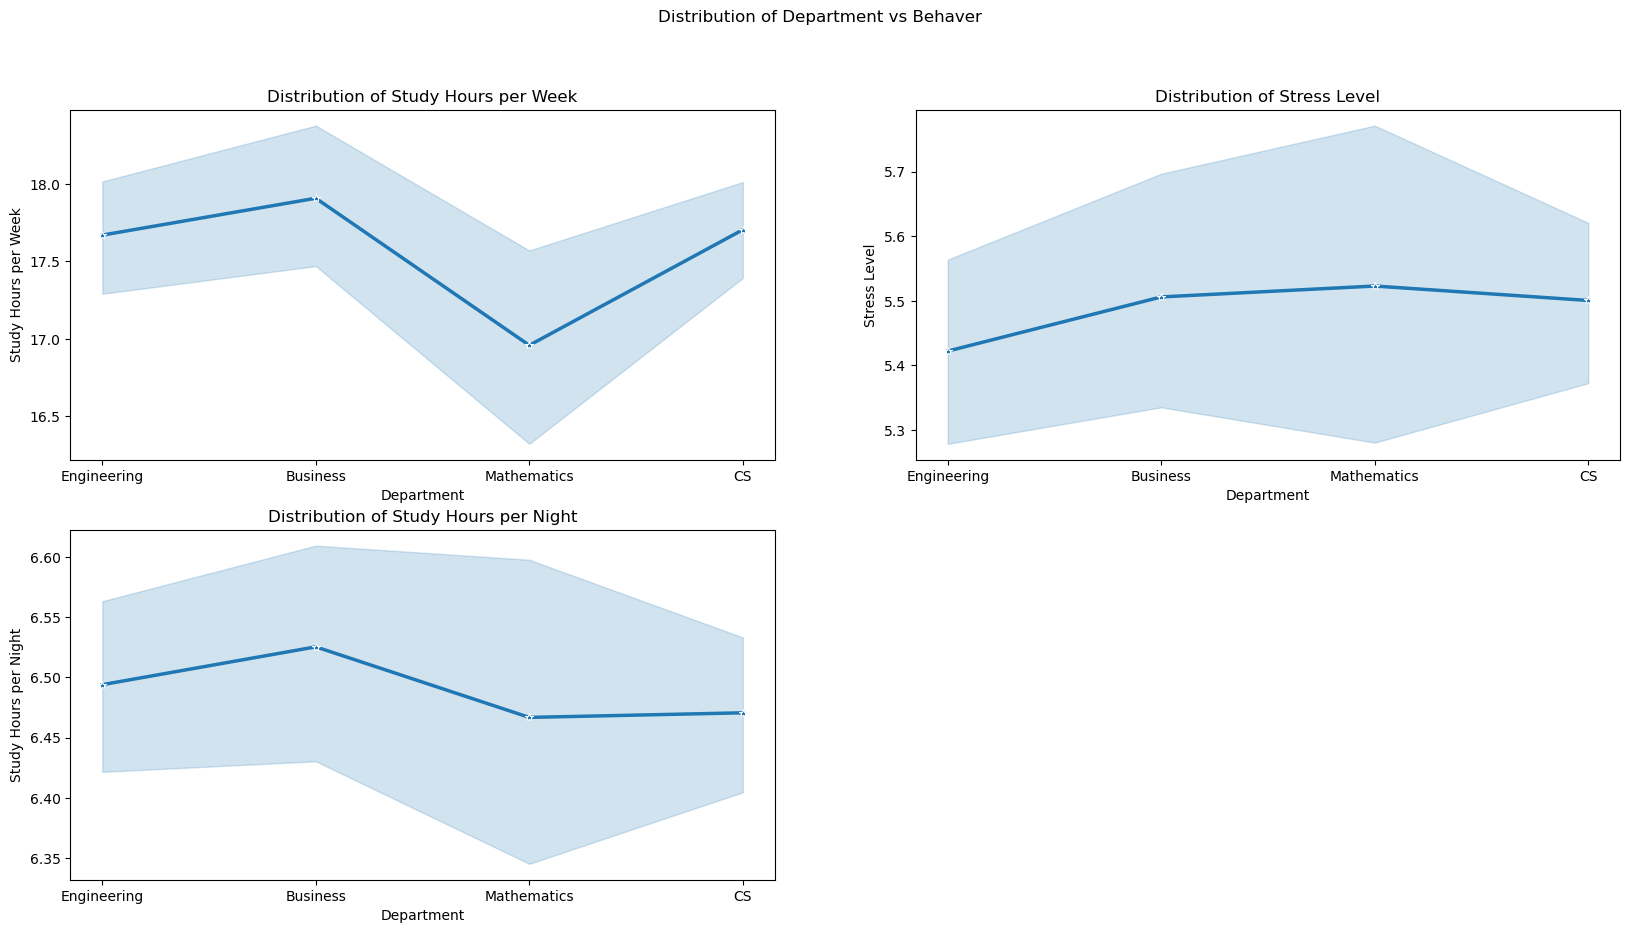

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\2070708350.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[behaver_list].agg(np.mean))


             Study_Hours_per_Week  Stress_Level (1-10)  Sleep_Hours_per_Night
Department                                                                   
Business                17.906461             5.505964               6.525447
CS                      17.703017             5.500495               6.470623
Engineering             17.668550             5.422056               6.494010
Mathematics             16.957853             5.522863               6.466799


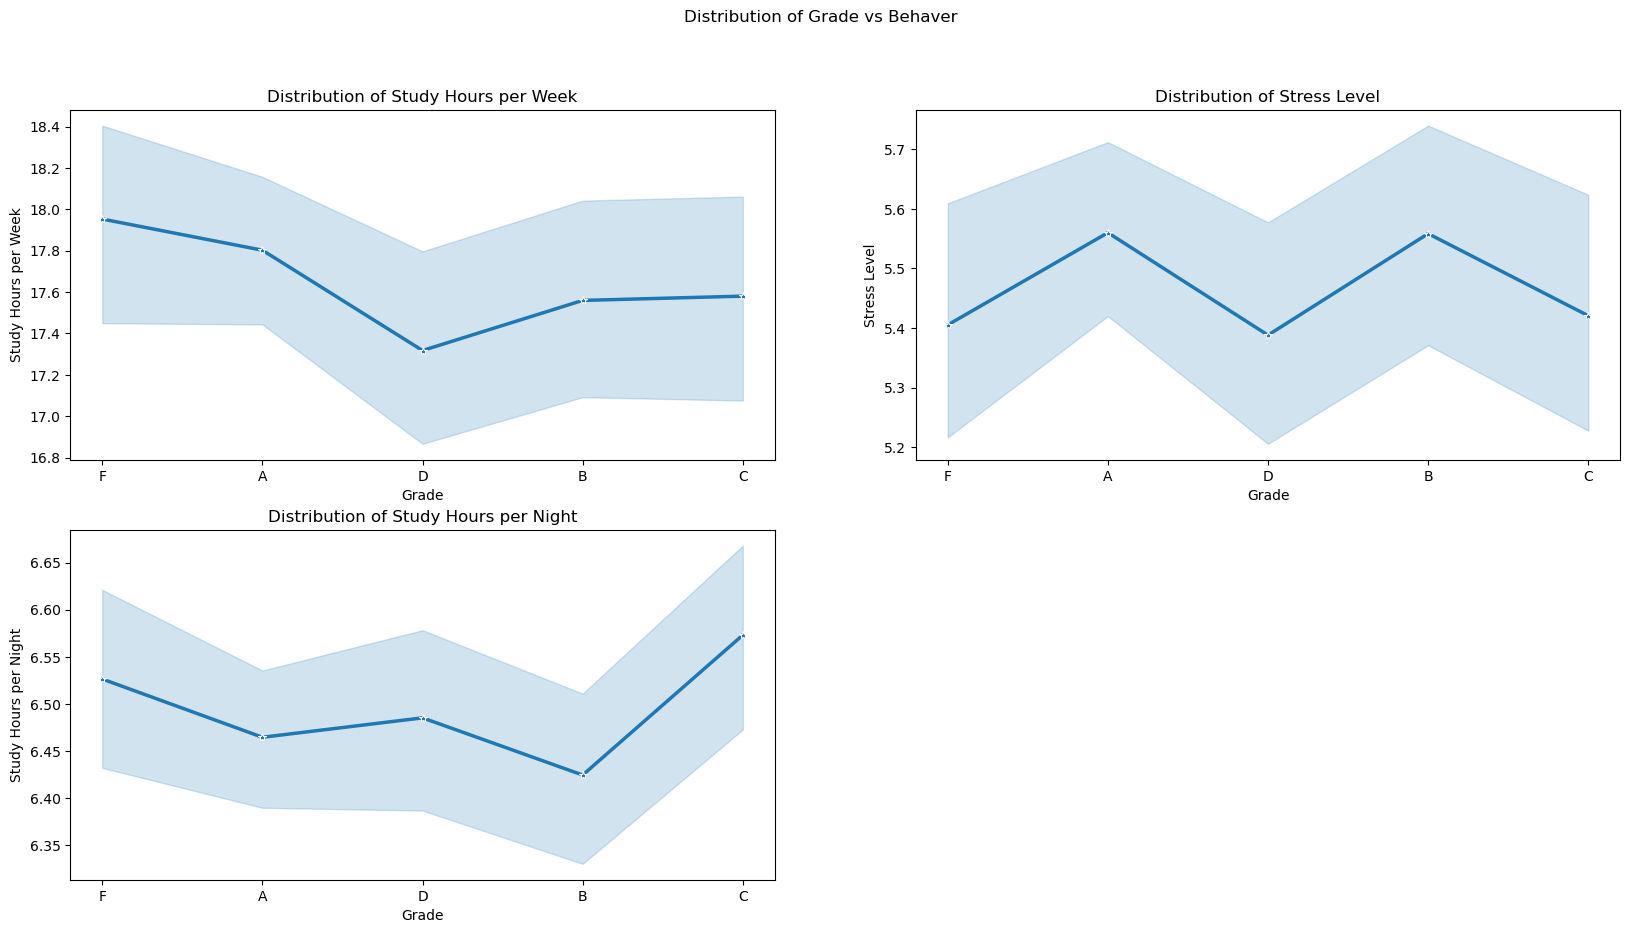

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\2070708350.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[behaver_list].agg(np.mean))


       Study_Hours_per_Week  Stress_Level (1-10)  Sleep_Hours_per_Night
Grade                                                                  
A                 17.802341             5.559866               6.464682
B                 17.559714             5.558282               6.424642
C                 17.580353             5.420655               6.573048
D                 17.317548             5.388076               6.485264
F                 17.952962             5.405213               6.526422


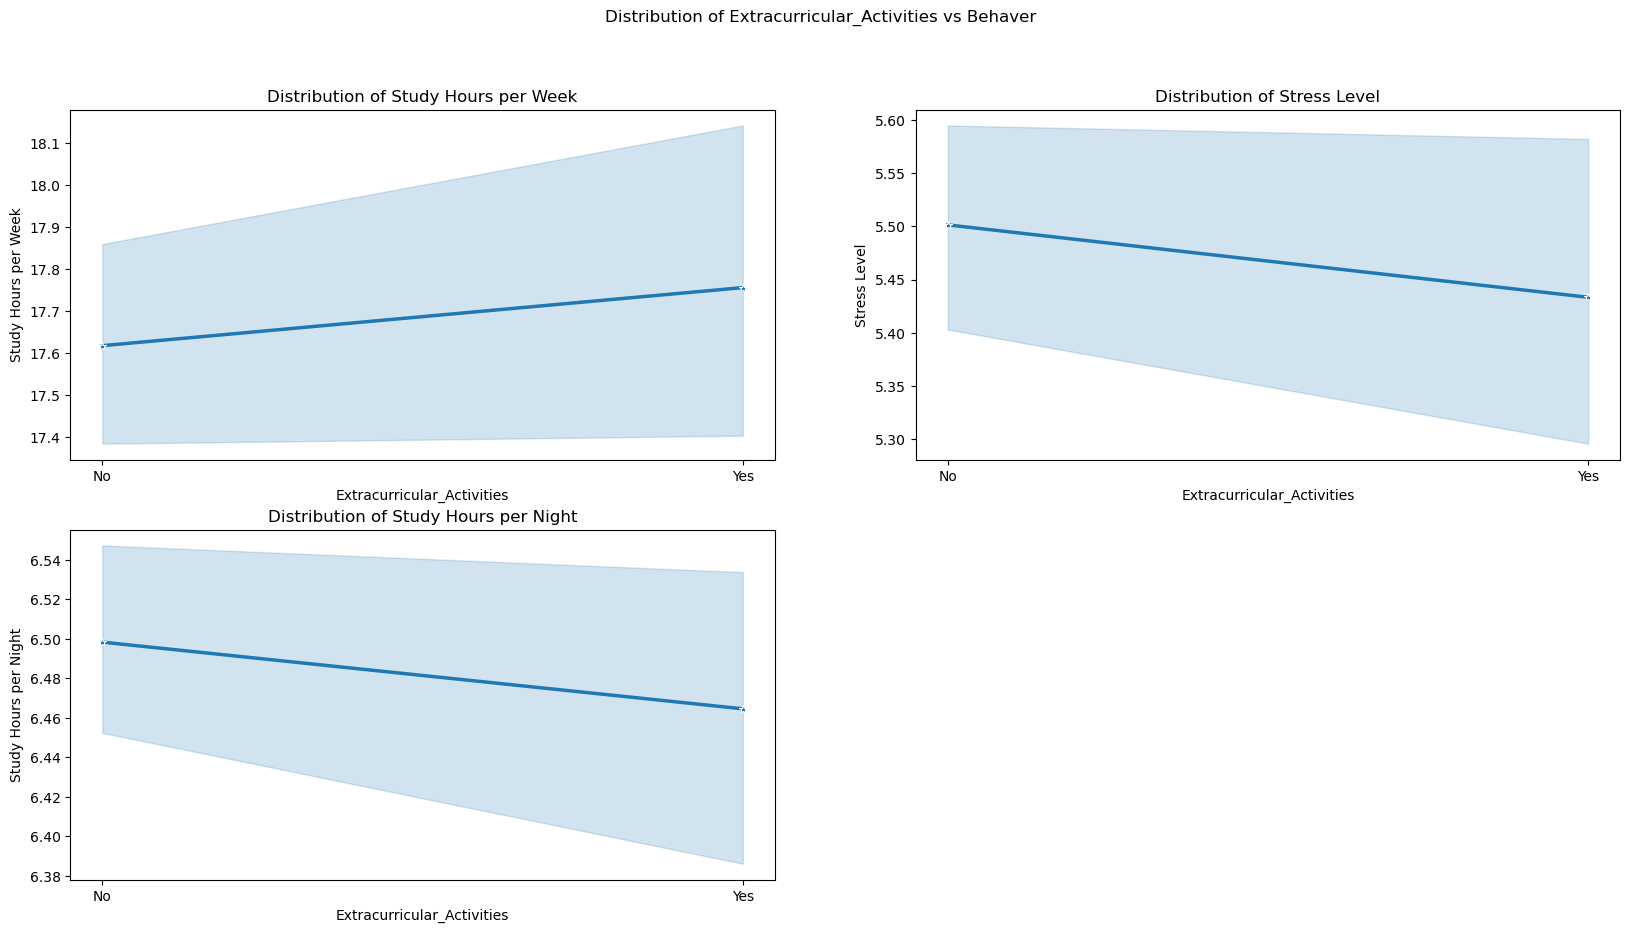

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\2070708350.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[behaver_list].agg(np.mean))


                            Study_Hours_per_Week  Stress_Level (1-10)  \
Extracurricular_Activities                                              
No                                     17.617177             5.501288   
Yes                                    17.755474             5.433311   

                            Sleep_Hours_per_Night  
Extracurricular_Activities                         
No                                       6.498311  
Yes                                      6.464565  


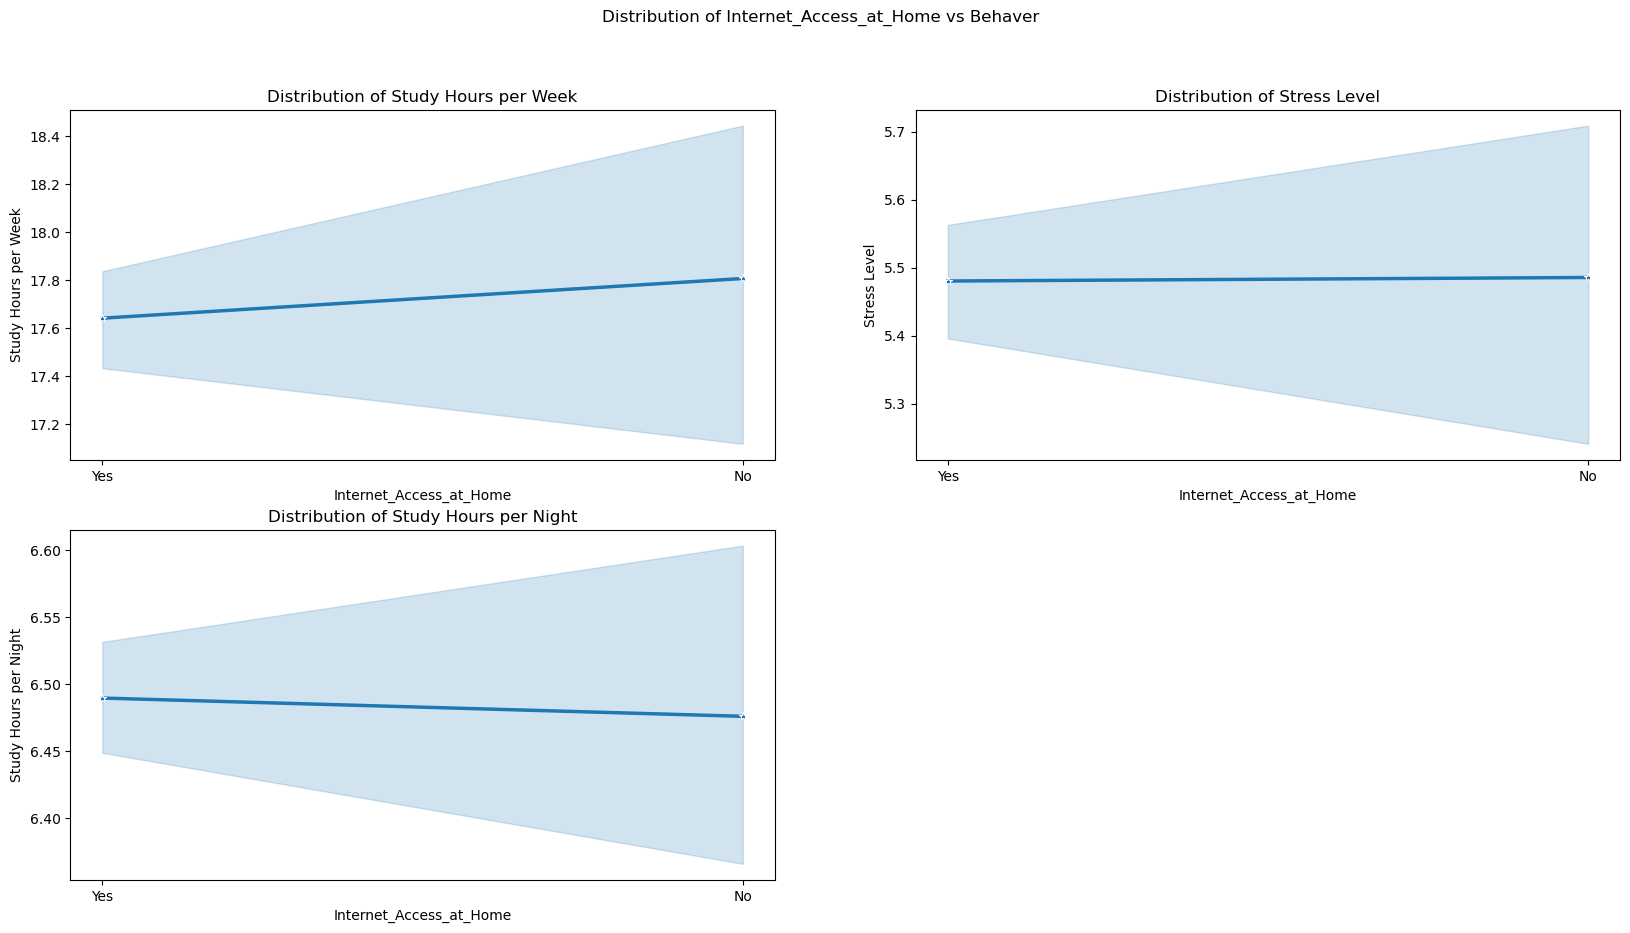

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\2070708350.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[behaver_list].agg(np.mean))


                         Study_Hours_per_Week  Stress_Level (1-10)  \
Internet_Access_at_Home                                              
No                                  17.806990             5.485437   
Yes                                 17.641851             5.480268   

                         Sleep_Hours_per_Night  
Internet_Access_at_Home                         
No                                    6.475922  
Yes                                   6.489543  


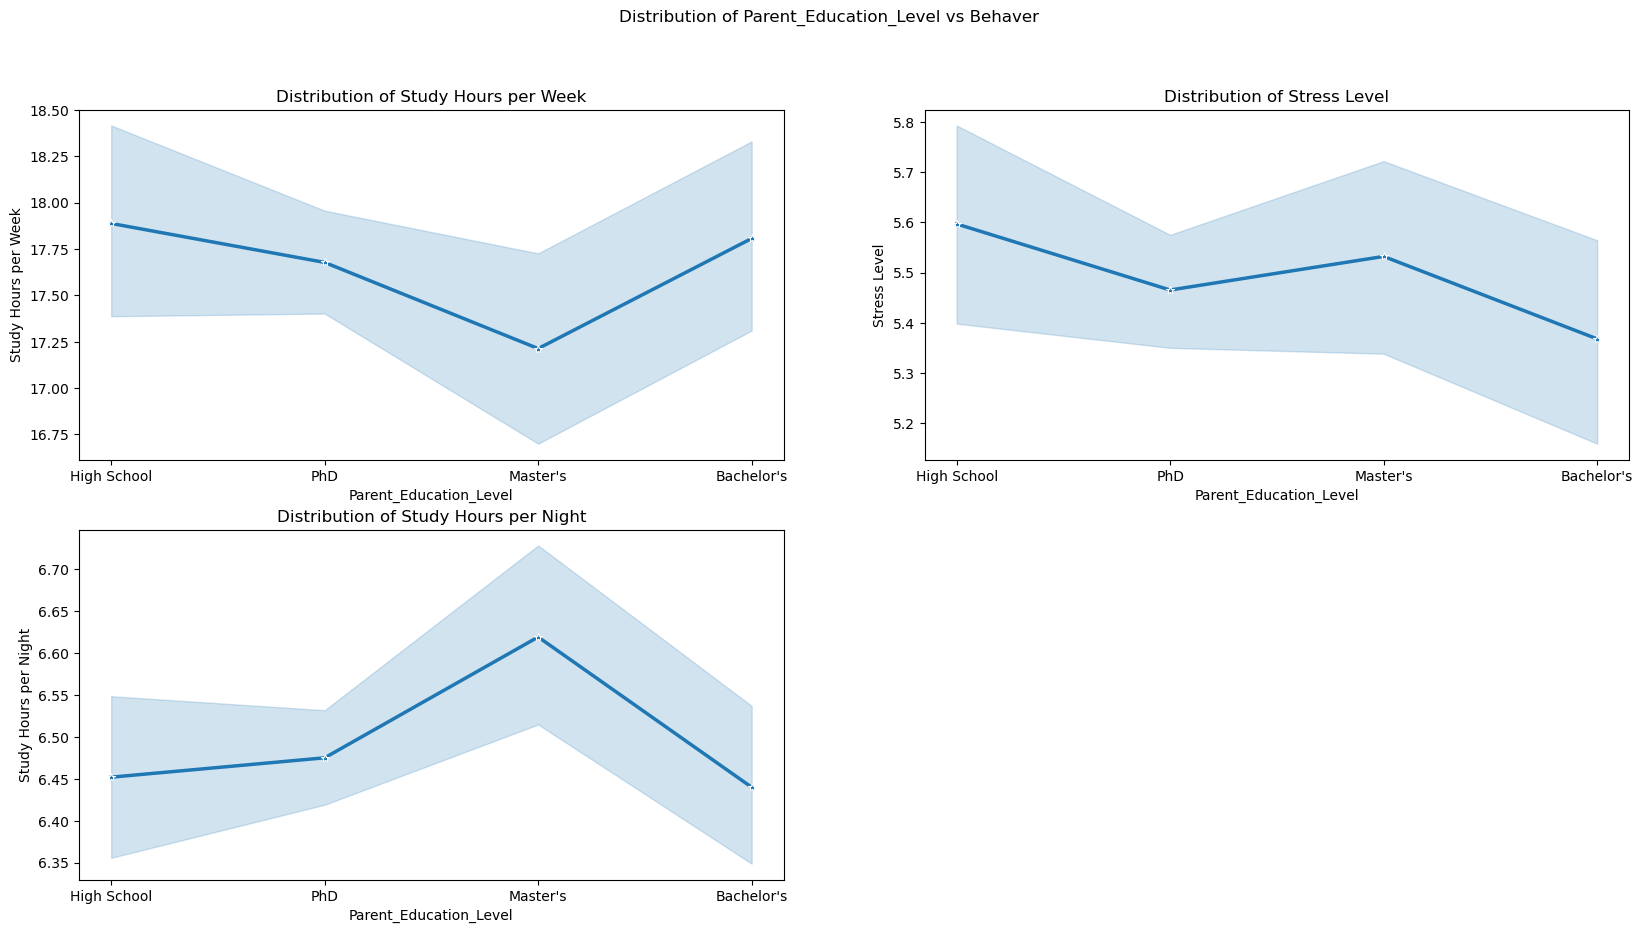

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\2070708350.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[behaver_list].agg(np.mean))


                        Study_Hours_per_Week  Stress_Level (1-10)  \
Parent_Education_Level                                              
Bachelor's                         17.806173             5.367901   
High School                        17.887060             5.596734   
Master's                           17.212564             5.532051   
PhD                                17.676894             5.465187   

                        Sleep_Hours_per_Night  
Parent_Education_Level                         
Bachelor's                           6.439877  
High School                          6.451884  
Master's                             6.619231  
PhD                                  6.475019  


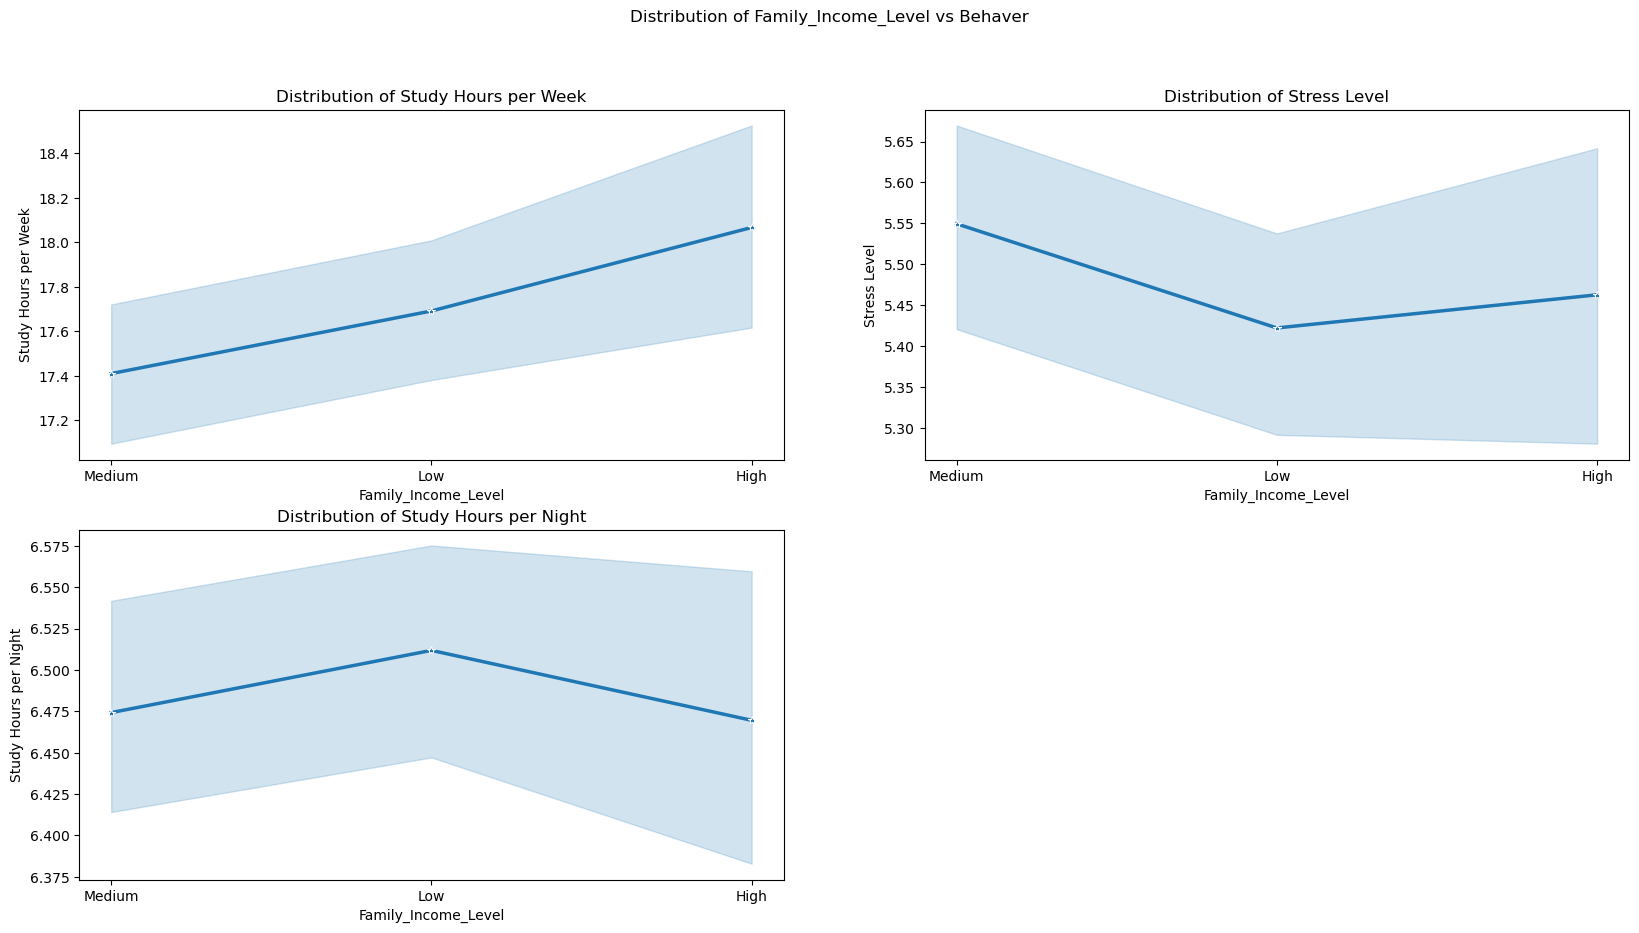

                     Study_Hours_per_Week  Stress_Level (1-10)  \
Family_Income_Level                                              
High                            18.066188             5.462644   
Low                             17.691528             5.422088   
Medium                          17.410492             5.549417   

                     Sleep_Hours_per_Night  
Family_Income_Level                         
High                              6.469540  
Low                               6.511800  
Medium                            6.474202  


C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_6120\2070708350.py:4: FutureWarning: The provided callable <function mean at 0x0000020A7F16BA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(i)[behaver_list].agg(np.mean))


In [152]:
for i in obj_list:
    if i != "Gender":
        Behaver_std(df,i)
        print(df.groupby(i)[behaver_list].agg(np.mean))

#   **EDA for Correlations**

<Axes: title={'center': 'Heatmap for Correlations'}>

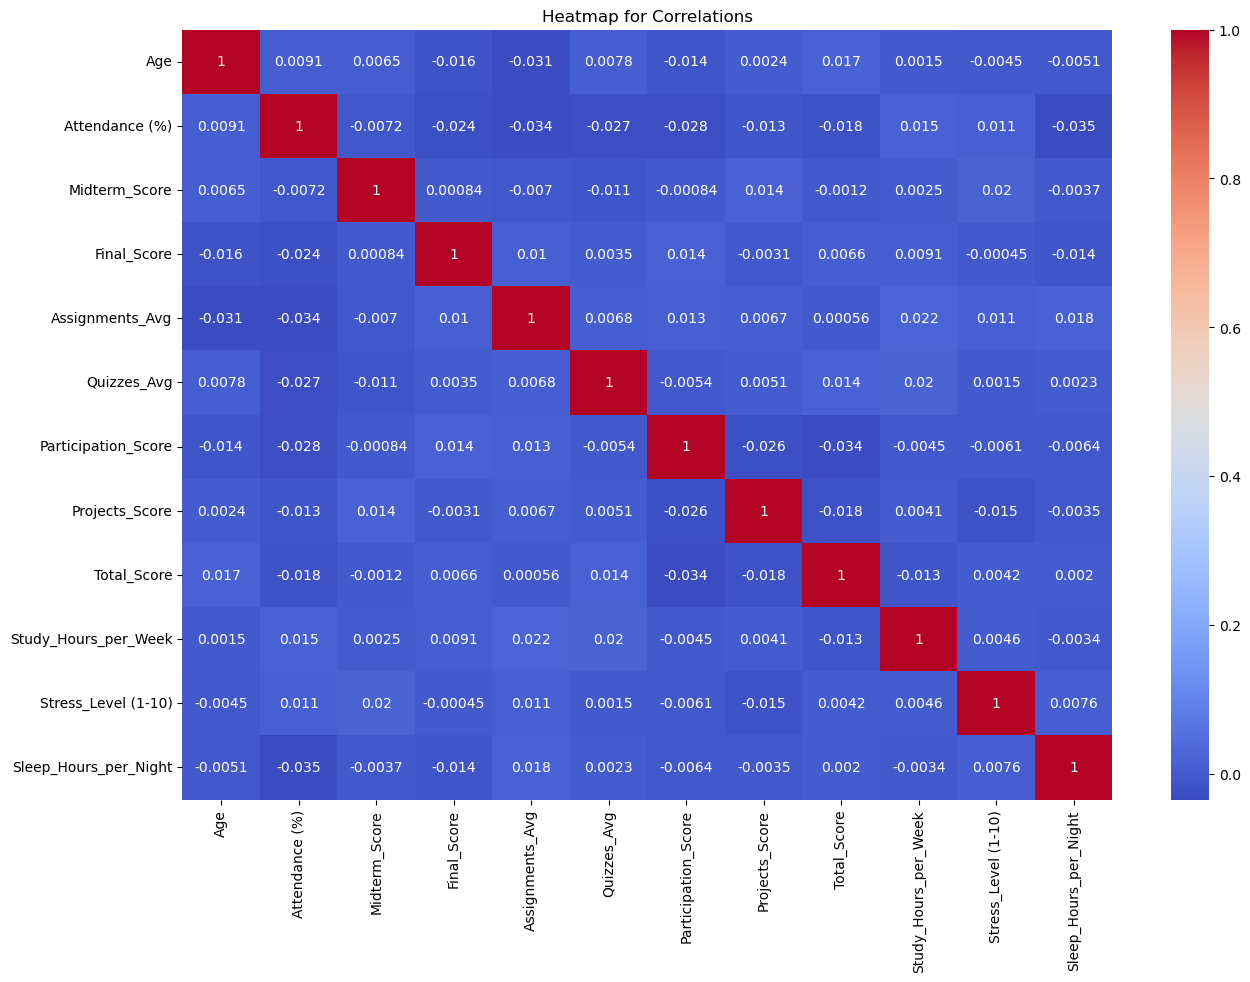

In [153]:
plt.figure(figsize=(15,10))
plt.title("Heatmap for Correlations")
sns.heatmap(df.select_dtypes(['int64','float64']).corr(), cmap="coolwarm",annot=True)

# **Hypothesis Tests** 

In [154]:
from scipy.stats import mannwhitneyu

We will Check if males can gain grades more that girls or not with right-tailed Wilcoxon-Mann-Whitney test 

In [155]:
results_scipy = mannwhitneyu(x=df[df['Gender'] == 'Male']["Total_Score"],
                             y=df[df['Gender'] == 'Female']["Total_Score"],
                             alternative="greater")

# we will set Choose a Significance Level with 10%

alpha = 0.1

if results_scipy.pvalue >= alpha:
    print (f"Yes, Males can gain Grades Greater than Female")
else :
    print("No, Males can't gain Grades Greater Than Females")

Yes, Males can gain Grades Greater than Female


**Extracurricular Activities vs Total Score**

In [ ]:
results_scipy = mannwhitneyu(x=df[df['Extracurricular_Activities'] == 'Yes']["Total_Score"],
                             y=df[df['Extracurricular_Activities'] == 'No']["Total_Score"],
                             alternative="greater")

# we will set Choose a Significance Level with 10%

alpha = 0.1

if results_scipy.pvalue >= alpha:
    print (f"Yes, Extracurricular Activities affect in Total Score it student play Extracurricular Activities")
else :
    print("No, Extracurricular Activities didn't affect in Total Score it student play Extracurricular Activities")

Yes, Extracurricular Activities affect in Sleep hours per Night it student play Extracurricular Activities


**Internet at Home vs Total Grade** 

In [ ]:
results_scipy = mannwhitneyu(x=df[df['Internet_Access_at_Home'] == 'Yes']["Total_Score"],
                             y=df[df['Internet_Access_at_Home'] == 'No']["Total_Score"],
                             alternative="greater")

# we will set Choose a Significance Level with 10%

alpha = 0.1

if results_scipy.pvalue >= alpha:
    print (f"Yes, internet affect in total score")
else :
    print("No, internet couden't affect in total score")

Yes, intern affect in total score


**Hypothes Test for Behaver**

In [ ]:
results_scipy = mannwhitneyu(x=df[df['Internet_Access_at_Home'] == 'Yes'][behaver_list],
                             y=df[df['Internet_Access_at_Home'] == 'No'][behaver_list],
                             alternative="greater")

# we will set Choose a Significance Level with 10%

alpha = 0.1

if (results_scipy.pvalue >= alpha).all():
    print("Yes, internet affects on behaver")
else:
    print("No, internet couldn't affect on Behaver")


Yes, internet affects the total score


In [163]:
results_scipy = mannwhitneyu(x=df[df['Extracurricular_Activities'] == 'Yes'][behaver_list],
                             y=df[df['Extracurricular_Activities'] == 'No'][behaver_list],
                             alternative="greater")

# we will set Choose a Significance Level with 10%

alpha = 0.1

if (results_scipy.pvalue >= alpha).all():
    print (f"Yes, Extracurricular Activities affect on Behaver")
else :
    print("No, Extracurricular Activities didn't affect on Behaver")

Yes, Extracurricular Activities affect on Behaver


**Optimising Total Score and Grade**

In [167]:
df["new_score"] = df['Attendance (%)'] * .05 + df['Midterm_Score'] * .3 + df['Final_Score'] * .4 + df['Quizzes_Avg'] * .05 + df['Participation_Score'] * .05 + df['Projects_Score'] * .15

In [168]:
for i in df.index:
    if df.loc[i, 'new_score'] >= 90:
        df.loc[i, 'new_Grade'] = 'A'
    elif df.loc[i, 'new_score'] >= 80:
        df.loc[i, 'new_Grade'] = 'B'
    elif df.loc[i, 'new_score'] >= 70:
        df.loc[i, 'new_Grade'] = 'C'
    elif df.loc[i, 'new_score'] >= 60:
        df.loc[i, 'new_Grade'] = 'D'
    else:
        df.loc[i, 'new_Grade'] = 'F'

df['new_Grade']

0       F
1       D
2       C
3       C
4       D
       ..
4995    D
4996    D
4997    D
4998    B
4999    D
Name: new_Grade, Length: 5000, dtype: object

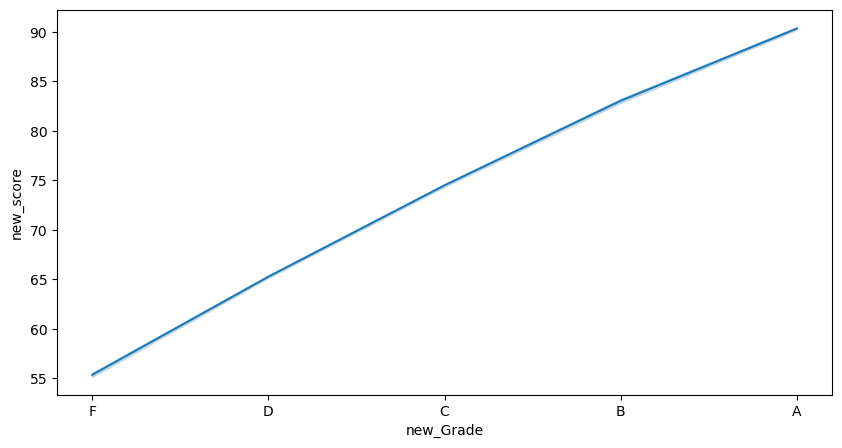

In [171]:
plt.figure(figsize=(10,5))
sns.lineplot(df,x='new_Grade',y='new_score')
plt.show()